### **seasonal forecast analysis** ###

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmocean as cmo
import os.path

import numpy as np
import seaborn as sns
from netCDF4 import Dataset as netcdf_dataset

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline
#sns.set()

In [3]:
def datareader(dp=[], d=[], v=[], *args):
    Dpath = []
    Dread = []
    for i in range(0,len(dp)):
        Dpath.append(dp[i] + d[i])
        if(d[i]==''):
            continue
        temp = netcdf_dataset(Dpath[i])
        try:
            Dread.append(temp.variables[v[i]][0,:,:])
        except:
            Dread.append(temp.variables[v[i]])
    try:
        Dread.append(temp.variables['lat'][:])
        Dread.append(temp.variables['lon'][:])
    except:
        print()
    return Dread

In [4]:
model1='chirps'

model2='ncep'
model3='dwd'
model4='ukmo'
model5='meteoFrance'
model6='ecmwf'
model7='cmcc'

season1='MAM'
season2='JJAS'
season3='OND'


### **all models and chirps overview** ###

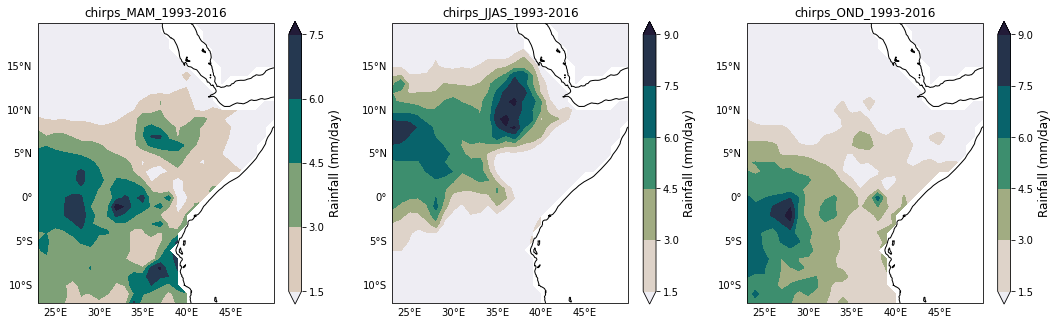

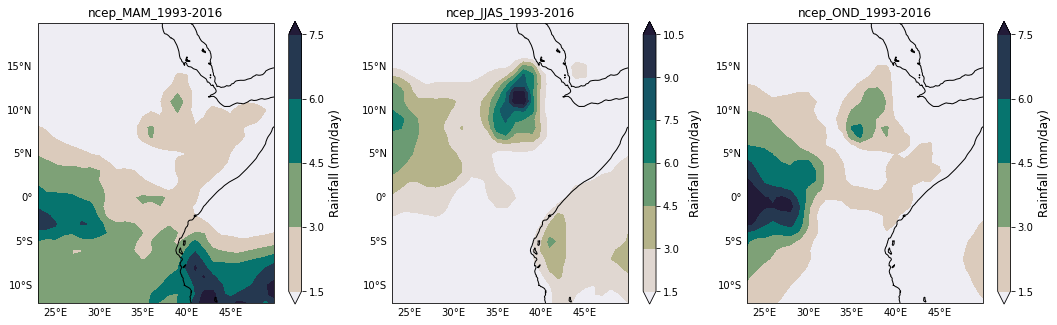

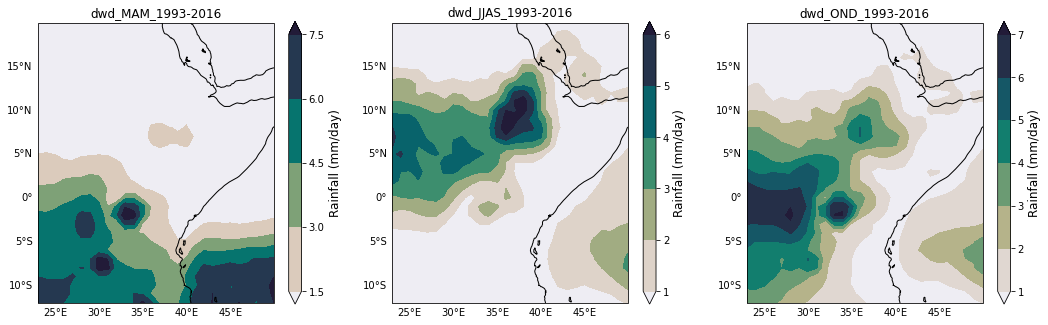

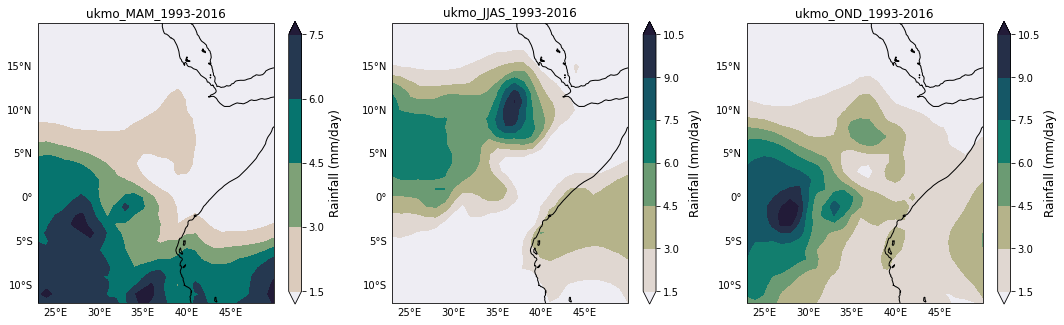

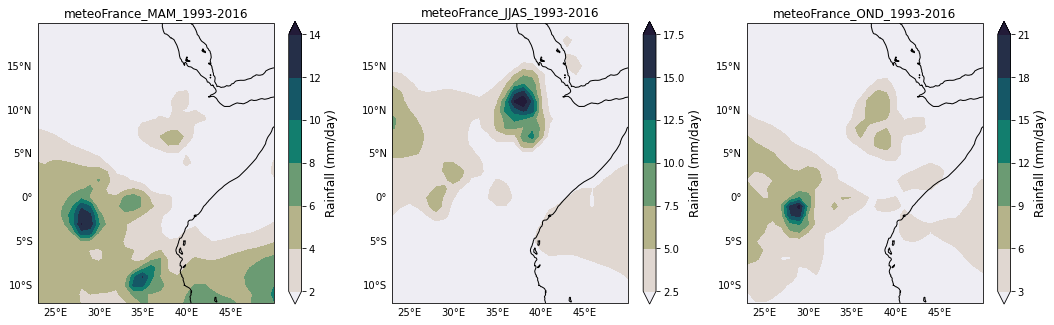

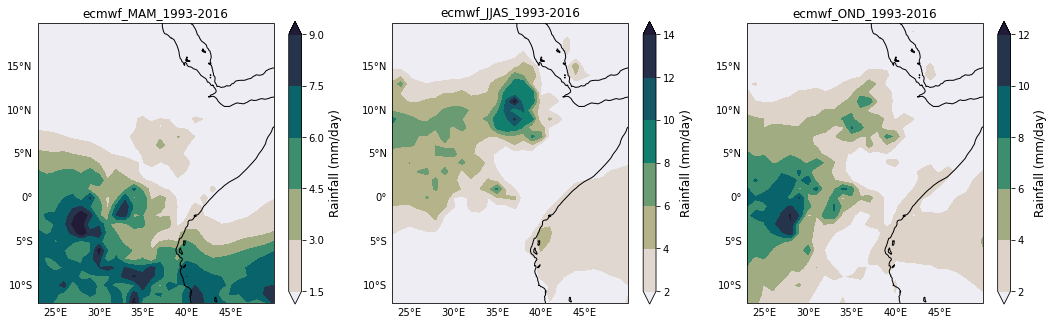

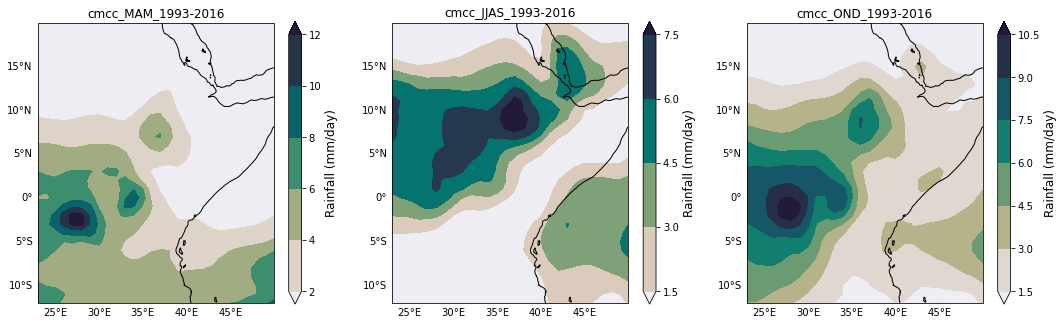

In [11]:
#spatial plots with raw data

models = [model1,model2,model3,model4,model5,model6,model7]
seasons = [season1,season2,season3]

MOD_VAR='precip'
#OBS_VAR='precip'
#BIAS_VAR='pr'

DATAPATH = '/home/hdesta/Documents/atmos/seasonalEastAfrica/eastAfrica/'
FIGPATH = 'plots/'

path = [DATAPATH]

variables = [MOD_VAR]

stepSize=30
colorbar_levels=np.linspace(0,18,stepSize)

for model in models:
    fig = plt.figure(figsize=(18,13))
    proj = ccrs.PlateCarree()
    ax_list = []
    gl_list = []
    ax = []
        
    for i in range(3):
        if (i == 0):
            ax_list.append(plt.subplot(1,3,i+1,projection=proj))
            gl_list.append(0)
        else:
            ax_list.append(plt.subplot(1,3,i+1, projection=proj, sharex=ax_list[0], sharey=ax_list[0]))
            gl_list.append(0)
        #print(gl_list)
            
    for i, season in zip(range(len(seasons)), seasons):
        #print(i)
        if not os.path.isfile(path[0] + MOD_VAR + '_' + model + '_' + season + '_timmean_1993-2016.nc'):  #if 'GCM-RCM' file doesn't exist, loop back
            continue
        
        data = ['precip_' + model + '_' + season + '_timmean_1993-2016.nc']
        #print(data) 
        [output, lats, lons] = datareader(path, data, variables)
              
        data_list = [output]
        labels_list = [model + '_' + season + '_1993-2016']

        CS = ax_list[i].contourf(lons, lats, data_list[0], transform=ccrs.PlateCarree(), cmap=cmo.cm.rain, extend='both')#, levels=colorbar_levels)#, norm=normalized)
        ax_list[i].coastlines()
        #ax_list[i].add_feature(shape_feature)
        ax_list[i].set(title=labels_list[0], xlabel='Longitude', ylabel='Latitude')
            
        ax_list[i].set_aspect('equal')
        
        cb = fig.colorbar(CS, ax=ax_list[i], orientation='vertical', shrink=0.4)#, format='%.2f')
        cb.set_label('Rainfall (mm/day)', fontsize=12)    
        #ax_list[i].legend(loc='upper left')
            
        gl_list[i] = ax_list[i].gridlines(crs=proj, draw_labels=True, linewidth=2, color='gray', alpha=0, linestyle='--')
        gl_list[i].top_labels = False
        gl_list[i].right_labels = False
            
        gl_list[i].xformatter = LONGITUDE_FORMATTER
        gl_list[i].yformatter = LATITUDE_FORMATTER

    plt.savefig(FIGPATH + 'precip_' + model + '_all_seasons_raw_1993-2016' + '.png', format='png', dpi=250, bbox_inches='tight')

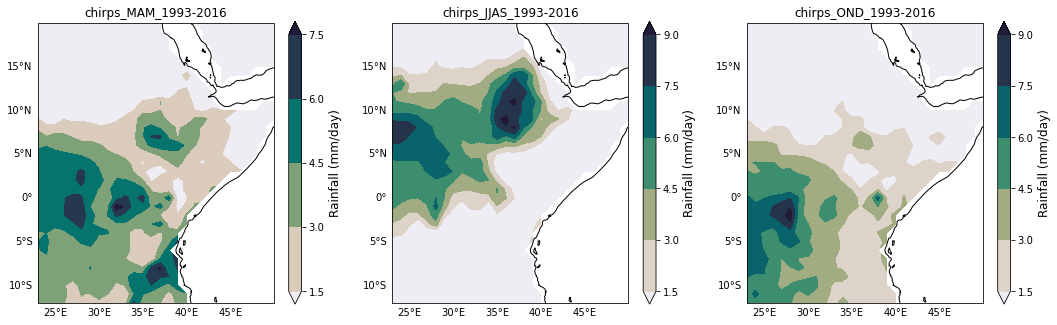

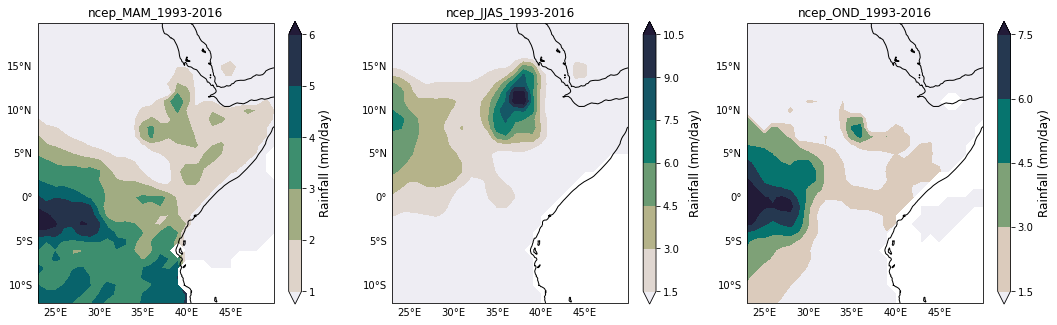

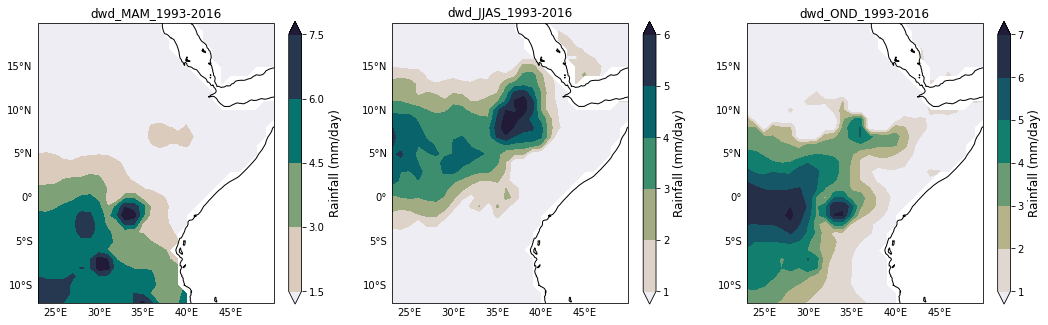

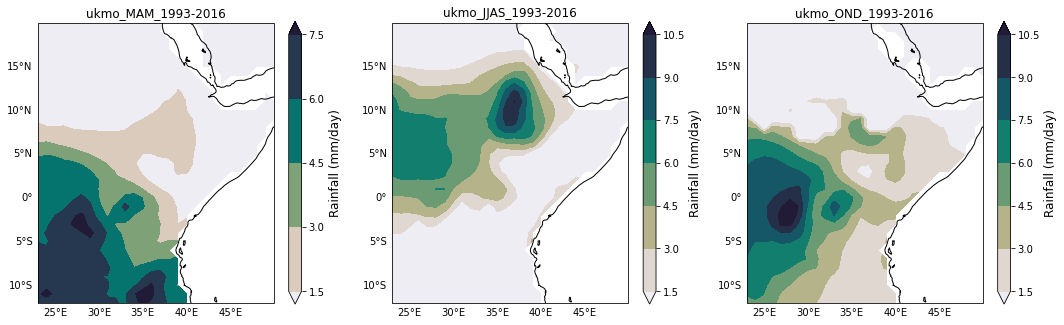

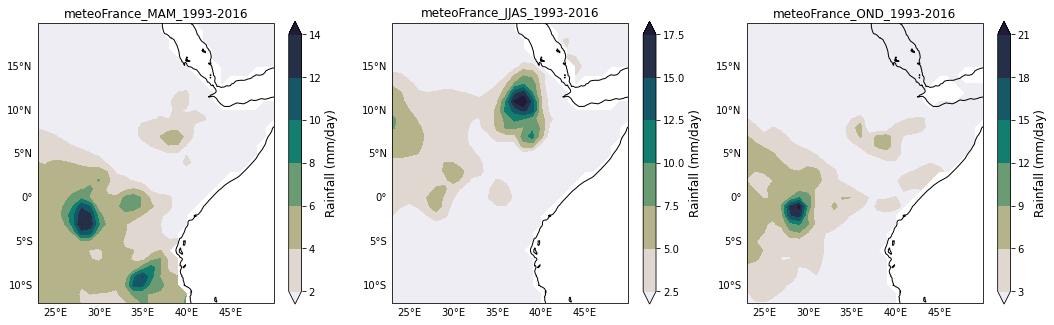

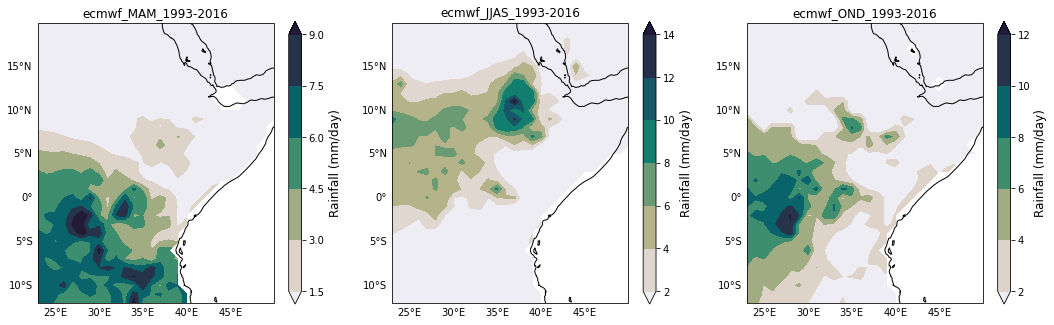

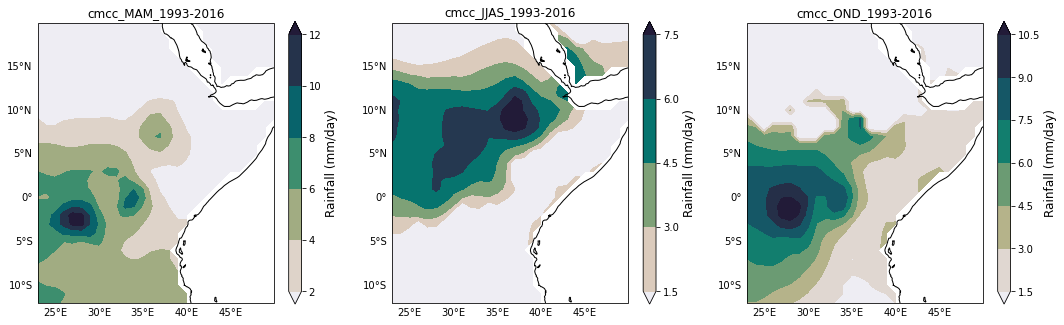

In [12]:
#spatial plots with masked values

models = [model1,model2,model3,model4,model5,model6,model7]
seasons = [season1,season2,season3]

MOD_VAR='precip'
#OBS_VAR='precip'
#BIAS_VAR='pr'

DATAPATH = '/home/hdesta/Documents/atmos/seasonalEastAfrica/eastAfrica/'
FIGPATH = 'plots/'

path = [DATAPATH]

variables = [MOD_VAR]

stepSize=30
colorbar_levels=np.linspace(0,18,stepSize)

for model in models:
    fig = plt.figure(figsize=(18,13))
    proj = ccrs.PlateCarree()
    ax_list = []
    gl_list = []
    ax = []
        
    for i in range(3):
        if (i == 0):
            ax_list.append(plt.subplot(1,3,i+1,projection=proj))
            gl_list.append(0)
        else:
            ax_list.append(plt.subplot(1,3,i+1, projection=proj, sharex=ax_list[0], sharey=ax_list[0]))
            gl_list.append(0)
        #print(gl_list)
            
    for i, season in zip(range(len(seasons)), seasons):
        #print(i)
        if not os.path.isfile(path[0] + MOD_VAR + '_' + model + '_' + season + '_masked_timmean_1993-2016.nc'):  #if 'GCM-RCM' file doesn't exist, loop back
            continue
        
        data = ['precip_' + model + '_' + season + '_masked_timmean_1993-2016.nc']
        #print(data) 
        [output, lats, lons] = datareader(path, data, variables)
              
        data_list = [output]
        labels_list = [model + '_' + season + '_1993-2016']

        CS = ax_list[i].contourf(lons, lats, data_list[0], transform=ccrs.PlateCarree(), cmap=cmo.cm.rain, extend='both')#, levels=colorbar_levels)#, norm=normalized)
        ax_list[i].coastlines()
        #ax_list[i].add_feature(shape_feature)
        ax_list[i].set(title=labels_list[0], xlabel='Longitude', ylabel='Latitude')
            
        ax_list[i].set_aspect('equal')
        
        cb = fig.colorbar(CS, ax=ax_list[i], orientation='vertical', shrink=0.4)#, format='%.2f')
        cb.set_label('Rainfall (mm/day)', fontsize=12)    
        #ax_list[i].legend(loc='upper left')
            
        gl_list[i] = ax_list[i].gridlines(crs=proj, draw_labels=True, linewidth=2, color='gray', alpha=0, linestyle='--')
        gl_list[i].top_labels = False
        gl_list[i].right_labels = False
            
        gl_list[i].xformatter = LONGITUDE_FORMATTER
        gl_list[i].yformatter = LATITUDE_FORMATTER

    plt.savefig(FIGPATH + 'precip_'+ model + '_all_seasons_masked_1993-2016' + '.png', format='png', dpi=250, bbox_inches='tight')

### **models, chirps, and bias plots** ###

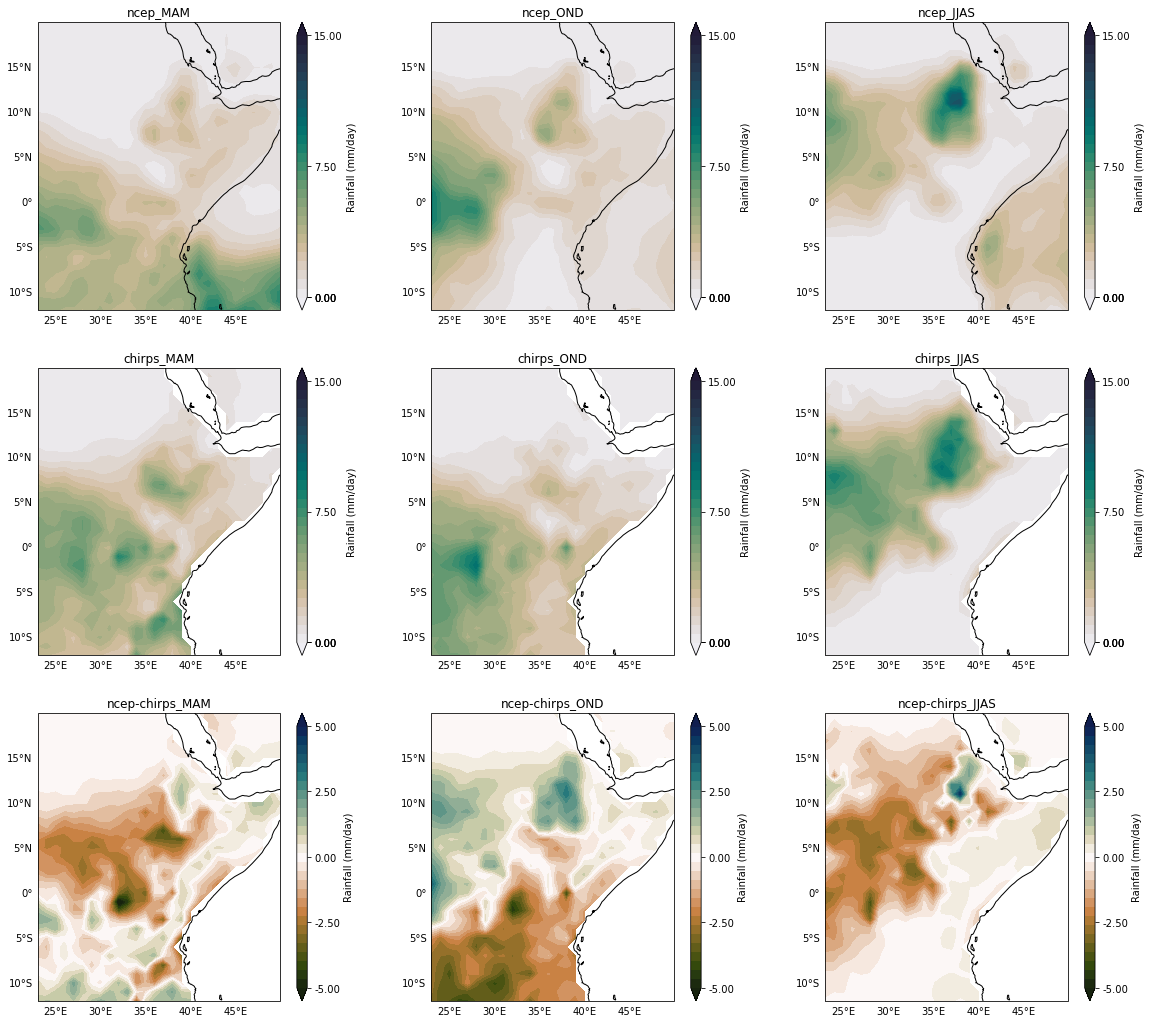

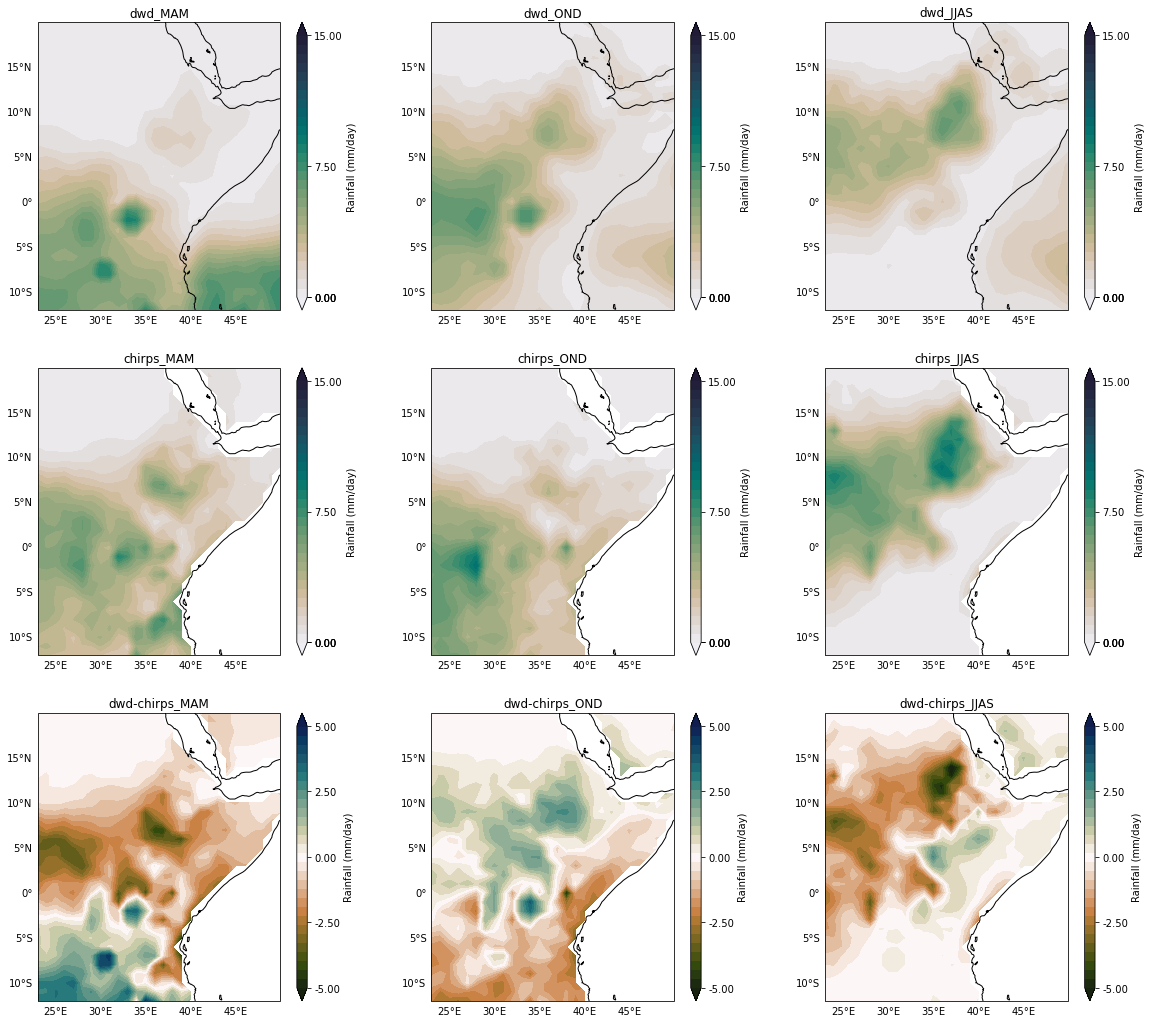

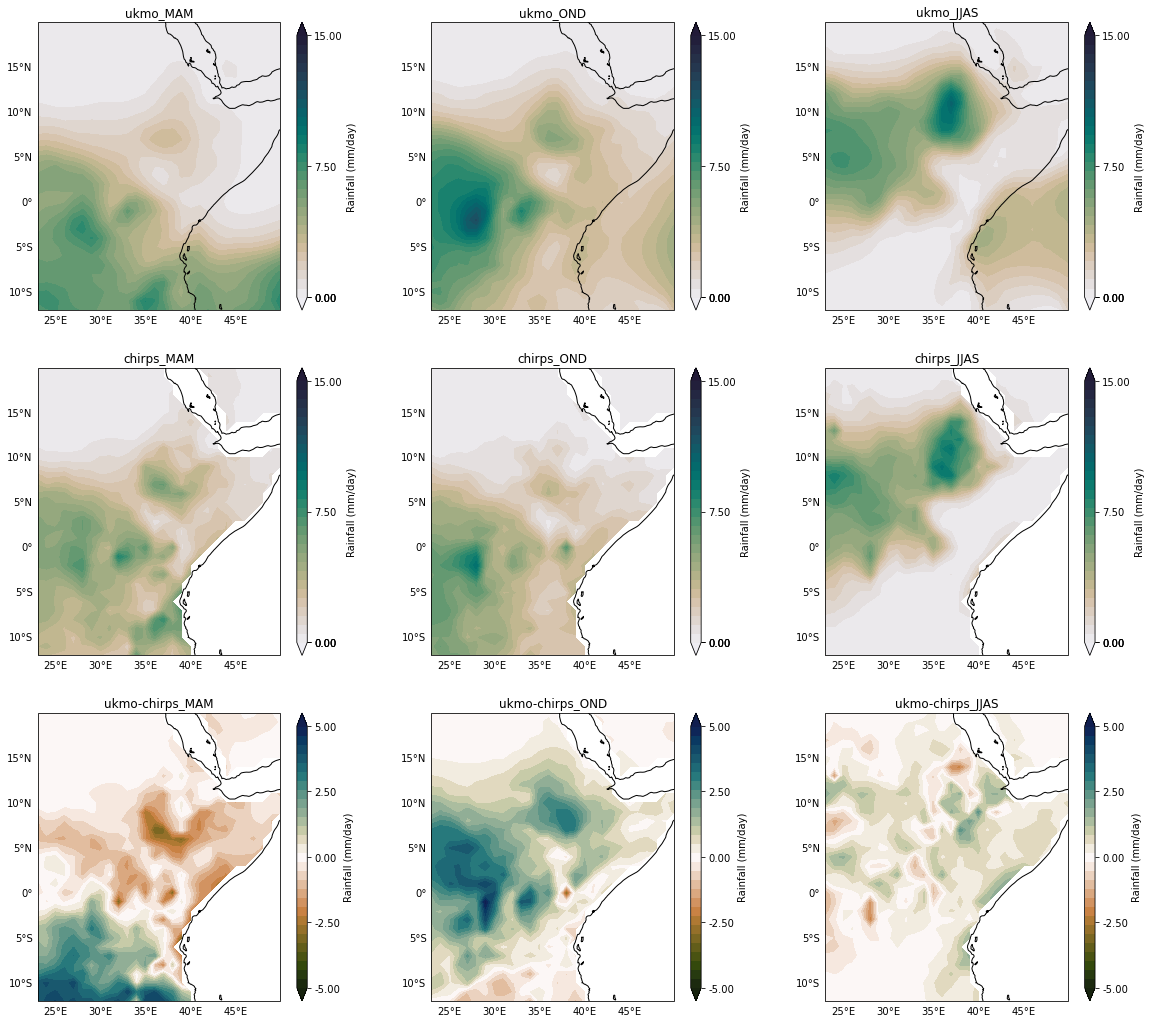

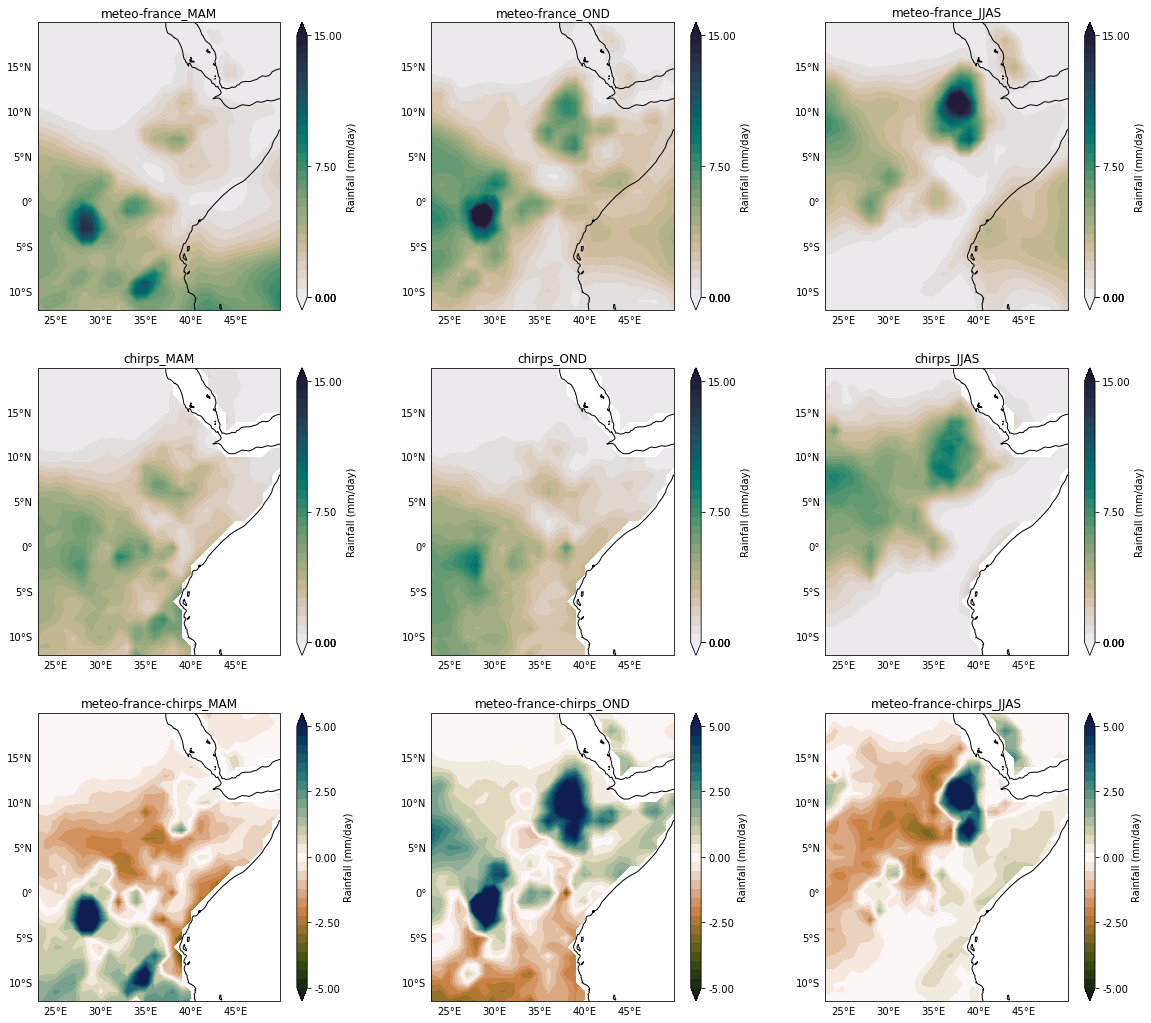

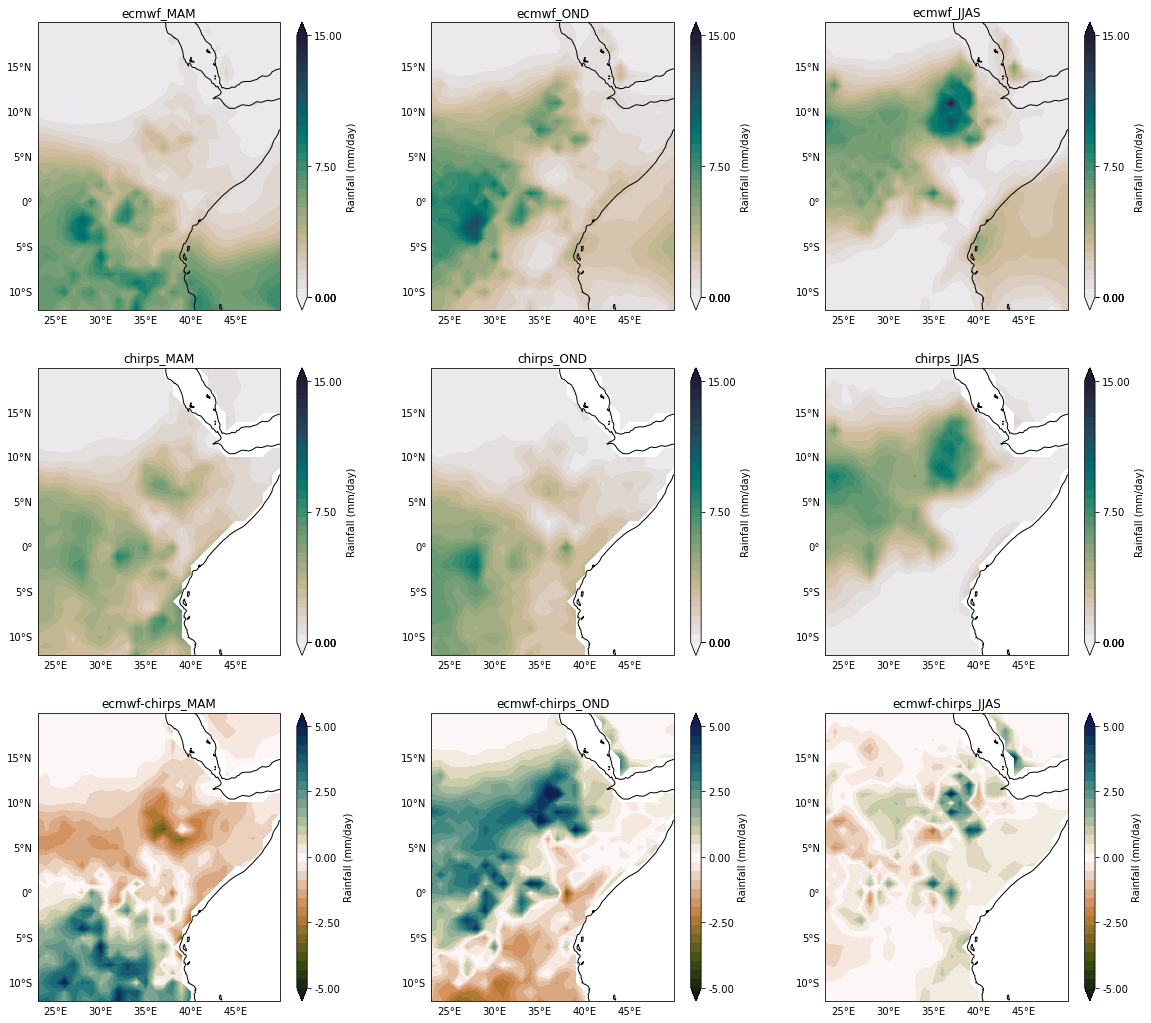

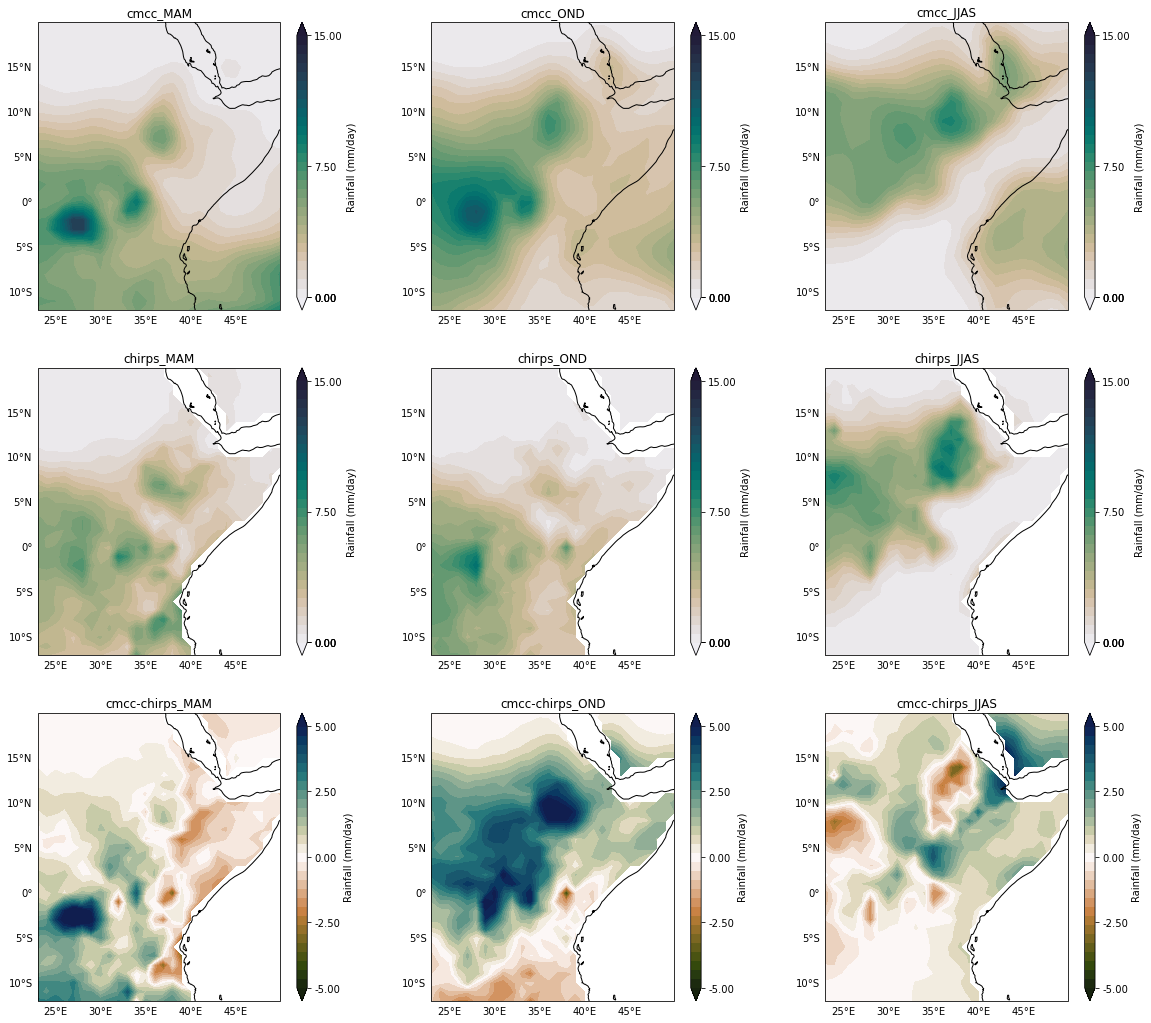

In [7]:
#spatial plots 

models = [model2,model3,model4,model5,model6,model7]
seasons = [season1,season2,season3]

MOD_VAR='precip'

DATAPATH = '/home/hdesta/Documents/atmos/seasonalEastAfrica/eastAfrica/'
FIGPATH = 'plots/'

path = [DATAPATH]

variables = [MOD_VAR]

for model in models:
    data = ['precip_' + model + '_MAM_timmean_1993-2016.nc', 'precip_' + model + '_OND_timmean_1993-2016.nc',
            'precip_' + model + '_JJAS_timmean_1993-2016.nc', 'precip_chirps_MAM_timmean_1993-2016.nc', 
            'precip_chirps_OND_timmean_1993-2016.nc', 'precip_chirps_JJAS_timmean_1993-2016.nc', 'precip_' + model + '-chirps_MAM_timmean_1993-2016.nc', 
            'precip_' + model + '-chirps_OND_timmean_1993-2016.nc', 'precip_' + model + '-chirps_JJAS_timmean_1993-2016.nc']
    
    [modelMAM, modelOND, modelJJAS, chirpsMAM, chirpsOND, chirpsJJAS, biasMAM, biasOND, biasJJAS, 
     lats, lons] = datareader(path*9, data, variables*9)
        
    fig = plt.figure(figsize=(20,18))
    proj = ccrs.PlateCarree()
        
    ax_list = []
    gl_list = []
    ax = []
        
    for i in range(9):
        if (i == 0):
            ax_list.append(plt.subplot(3,3,i+1,projection=proj))
        else:
            ax_list.append(plt.subplot(3,3,i+1, projection=proj, sharex=ax_list[0], sharey=ax_list[0]))
        gl_list.append(0)

        
    data_list = [modelMAM, modelOND, modelJJAS, chirpsMAM, chirpsOND, chirpsJJAS, biasMAM, biasOND, biasJJAS]
    labels_list = [model + '_MAM', model + '_OND', model + '_JJAS','chirps_MAM', 'chirps_OND', 'chirps_JJAS', model + '-chirps_MAM', model + '-chirps_OND', model + '-chirps_JJAS']
        
    colorbar_levels = np.linspace(0,10,20)
    
    stepSize=30

    colorbarLevels1 = np.linspace(-5,5,stepSize) #diff-dataset1
    colorbarLevels2 = np.linspace(0,15,stepSize)
    
    colorMap1=cmo.cm.tarn
    colorMap2=cmo.cm.rain

    for i in range(9):
        
        if(i>5):
            CS = ax_list[i].contourf(lons, lats, data_list[i], transform=ccrs.PlateCarree(), cmap=colorMap1, extend='both', levels=colorbarLevels1)
            cb = fig.colorbar(CS,ax=ax_list[i],aspect=25, shrink=1.0, ticks=[colorbarLevels1.min(),colorbarLevels1.min()/2,0,colorbarLevels1.max()/2,colorbarLevels1.max()])
            cb.ax.set_yticklabels(["{:.2f}".format(i) for i in cb.get_ticks()])
            cb.ax.set_ylabel('Rainfall (mm/day)')
        else:
            CS = ax_list[i].contourf(lons, lats, data_list[i], transform=ccrs.PlateCarree(), cmap=colorMap2, extend='both', levels=colorbarLevels2)
            cb = fig.colorbar(CS,ax=ax_list[i],aspect=25, shrink=1.0, ticks=[colorbarLevels2.min(),colorbarLevels2.min()/2,0,colorbarLevels2.max()/2,colorbarLevels2.max()])
            cb.ax.set_yticklabels(["{:.2f}".format(i) for i in cb.get_ticks()])
            cb.ax.set_ylabel('Rainfall (mm/day)')
            
        #CS = ax_list[i].contourf(lons, lats, data_list[i], transform=ccrs.PlateCarree(), cmap='Greens', extend='both')#, levels=colorbar_levels, norm=normalized)
        ax_list[i].coastlines()
        #ax_list[i].add_feature(shape_feature)
        ax_list[i].set(title=labels_list[i], xlabel='Longitude', ylabel='Latitude')
            
        ax_list[i].set_aspect('equal')
        
        #cb = fig.colorbar(CS, ax=ax_list[i], orientation='vertical', shrink=0.7)#, format='%.2f')
        #cb.set_label('Rainfall (mm/day)', fontsize=12) 
            
        #ax_list[i].legend(loc='upper left')
            
        gl_list[i] = ax_list[i].gridlines(crs=proj, draw_labels=True, linewidth=2, color='gray', alpha=0, linestyle='--')
        gl_list[i].top_labels = False
        gl_list[i].right_labels = False
            
        gl_list[i].xformatter = LONGITUDE_FORMATTER
        gl_list[i].yformatter = LATITUDE_FORMATTER

    plt.savefig(FIGPATH + 'precip_' + model + '_' + '1993-2016' + '.png', format='png', dpi=250, bbox_inches='tight')

### **Time series plots** ###

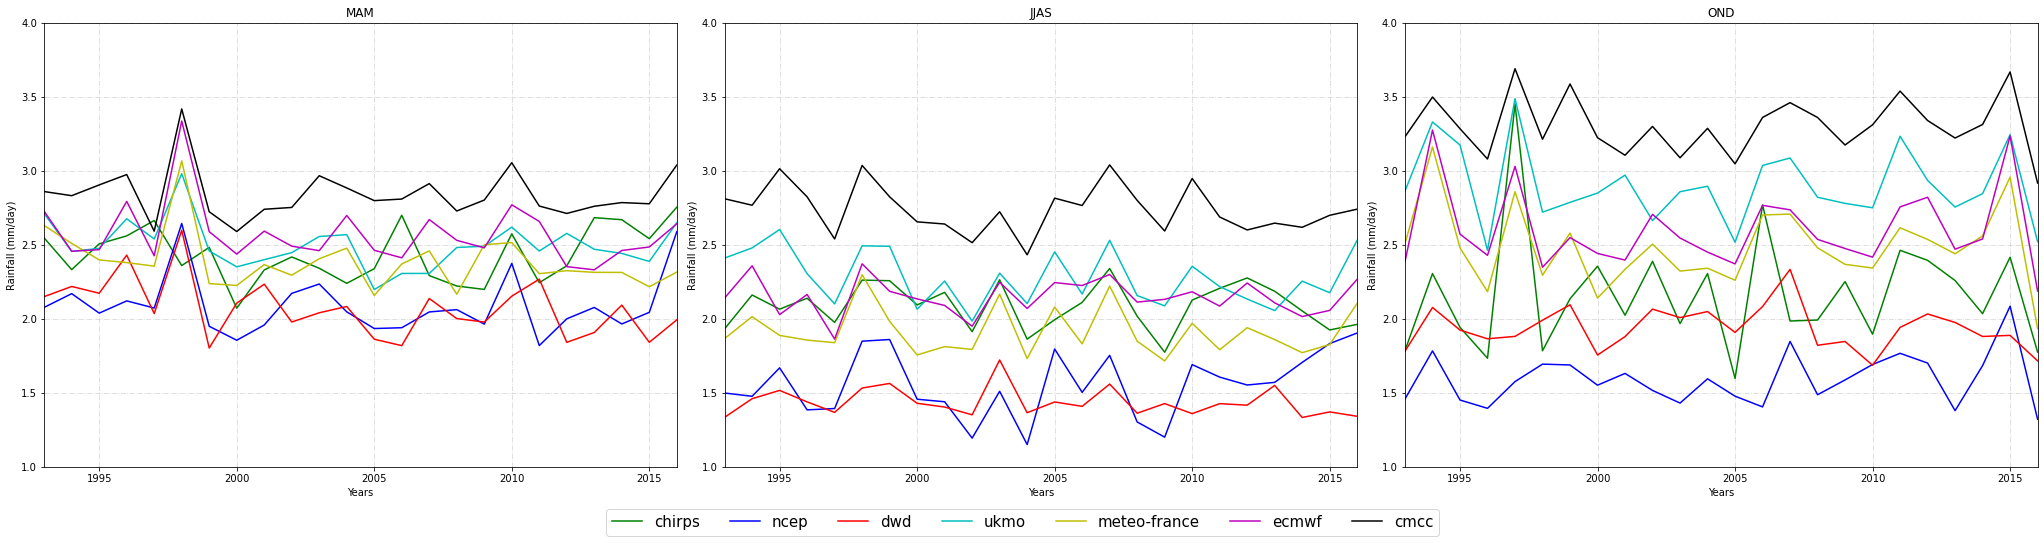

In [8]:
models = [model1, model2, model3, model4, model5, model6, model7]
seasons = [season1, season2, season3]

MOD_VAR='precip'
DATAPATH = '/home/hdesta/Documents/atmos/seasonalEastAfrica/eastAfrica/'
FIGPATH = 'plots/'

path = [DATAPATH]
variable = [MOD_VAR]

x = np.arange(1993,2017)

fig = plt.figure(figsize=(30,8))
ax1 = fig.add_subplot(131, title='MAM')
ax2 = fig.add_subplot(132, title='JJAS')
ax3 = fig.add_subplot(133, title='OND')

ax = [ax1, ax2, ax3]
colors=['g','b','r','c','y','m','k']

for i, season in zip(range(len(seasons)), seasons):
    for j, model in zip(range(len(models)), models):
        data = ['precip_' + model + '_' + season +'_yearmean_fldmean_1993-2016.nc']
        [output] = datareader(path, data, variable)
        ax[i].plot(x, output, colors[j], label=models[j])
    ax[i].set_xlabel('Years')
    ax[i].set_ylabel('Rainfall (mm/day)')
    #ax[i].set_xlabel('Years', fontsize=16, fontweight='bold')
    #ax[i].set_ylabel('Standardized Anomalies', fontsize=16, fontweight='bold')
    ax[i].set_xlim([1993,2016])
    ax[i].set_ylim([1,4])
    ax[i].grid(True, alpha=0.5, linestyle='-.',linewidth=0.8)

fig.legend(models, loc="lower center", ncol=7, prop={'size':15})  
fig.tight_layout(rect=[0.05, 0.06, 1, 0.95])

plt.savefig(FIGPATH + 'precip_timeseries_' + season + '_' + '1993-2016' + '.png', format='png', dpi=300, bbox_inches='tight')

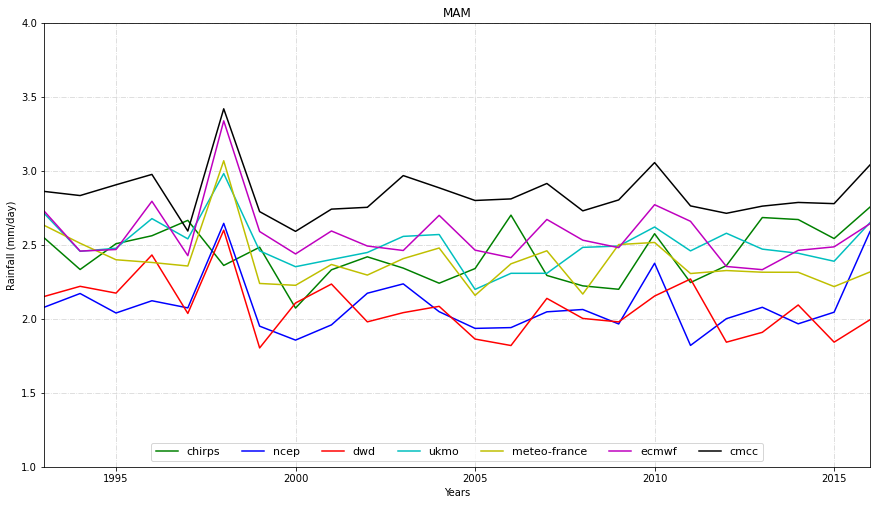

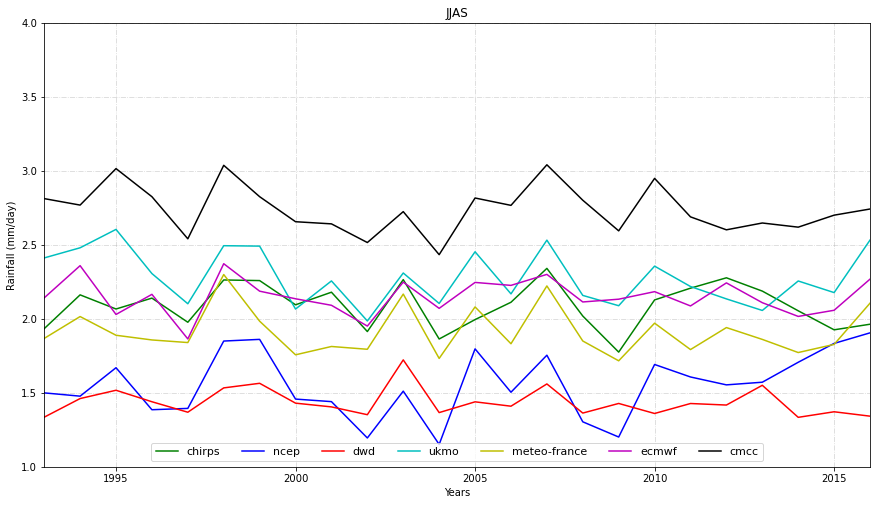

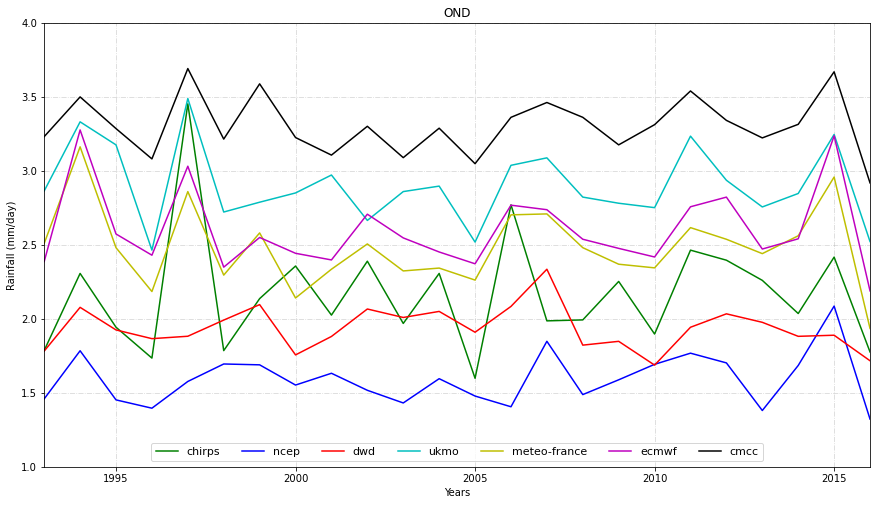

In [9]:
models = [model1, model2, model3, model4, model5, model6, model7]
seasons = [season1, season2, season3]

MOD_VAR='precip'
DATAPATH = '/home/hdesta/Documents/atmos/seasonalEastAfrica/eastAfrica/'
FIGPATH = 'plots/'

path = [DATAPATH]
variable = [MOD_VAR]

x = np.arange(1993,2017)

colors=['g','b','r','c','y','m','k']

for i, season in zip(range(len(seasons)), seasons):
    fig = plt.figure(figsize=(30,8))
    ax = fig.add_subplot(131, title=season)
    for j, model in zip(range(len(models)), models):
        data = ['precip_' + model + '_' + season +'_yearmean_fldmean_1993-2016.nc']
        [output] = datareader(path, data, variable)
        ax.plot(x, output, colors[j], label=models[j])
        ax.set_xlabel('Years')
        ax.set_ylabel('Rainfall (mm/day)')
        #ax[i].set_xlabel('Years', fontsize=16, fontweight='bold')
        #ax[i].set_ylabel('Standardized Anomalies', fontsize=16, fontweight='bold')
        ax.set_xlim([1993,2016])
        ax.set_ylim([1,4])
        ax.grid(True, alpha=0.5, linestyle='-.',linewidth=0.8)

    ax.legend(models, loc="lower center", ncol=7, prop={'size':11})  
    fig.tight_layout(rect=[0.05, 0.06, 1.3, 0.95])

    plt.savefig(FIGPATH + 'precip_timeseries_' + season + '_' + '1993-2016' + '.png', format='png', dpi=300, bbox_inches='tight')

### **Season-wise plots** ###

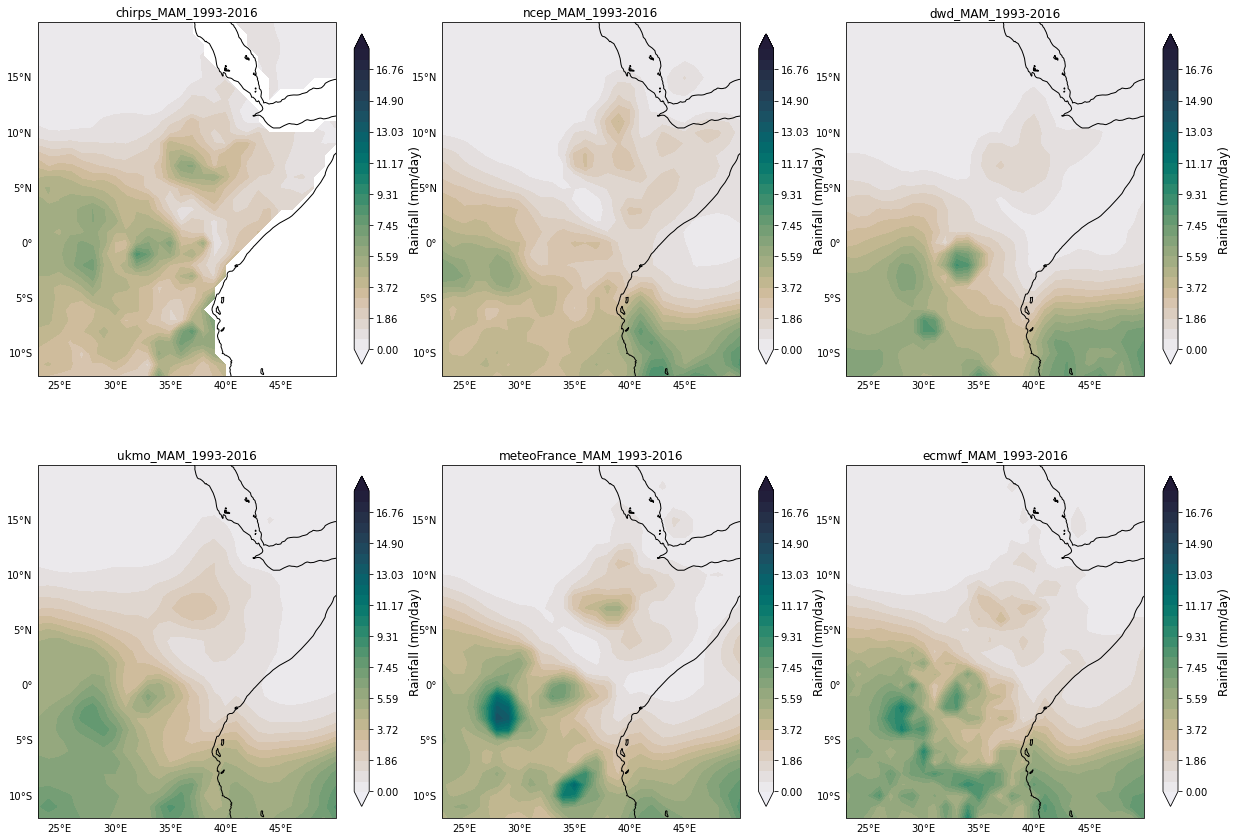

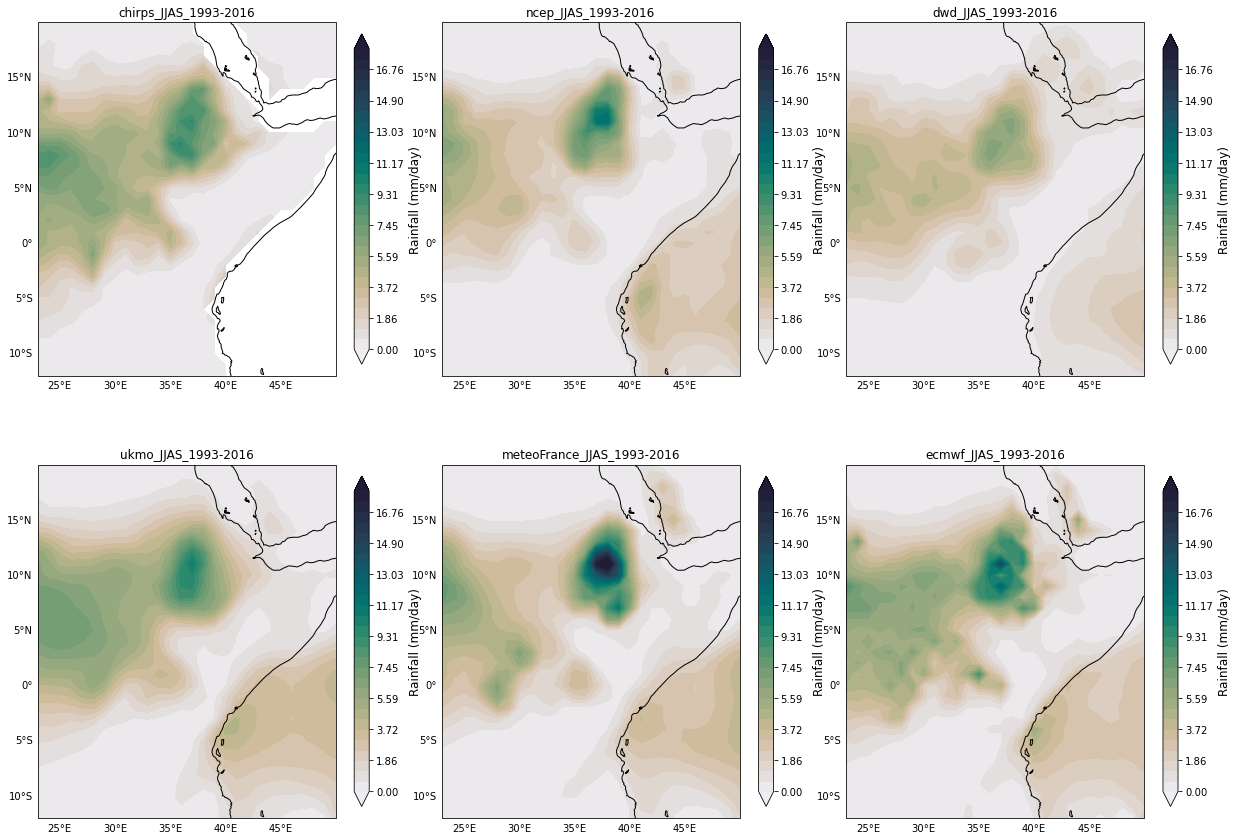

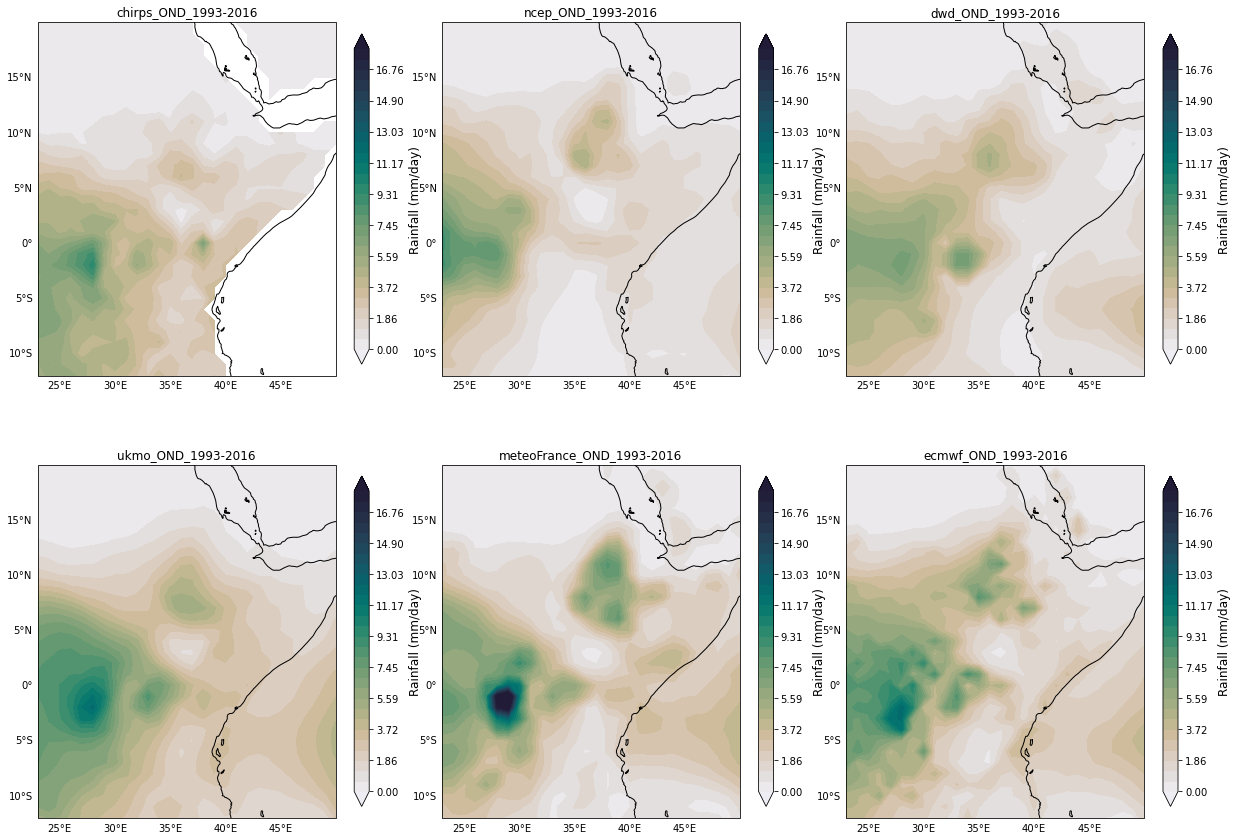

In [14]:
#spatial plots (seasons-wise) with raw data

models = [model1,model2,model3,model4,model5,model6]
seasons = [season1,season2,season3]

MOD_VAR='precip'
DATAPATH = '/home/hdesta/Documents/atmos/seasonalEastAfrica/eastAfrica/'
FIGPATH = 'plots/'

path = [DATAPATH]
variables = [MOD_VAR]

for season in seasons:
    #set seasonal thresholds
    if(season == 'MAM'):
        threshold = 4 
    elif(season == 'JJAS'):
        threshold = 7
    else:
        threshold = 3
    
    #set plot figure areas
    fig = plt.figure(figsize=(17,13))
    proj = ccrs.PlateCarree()
    ax_list = []
    gl_list = []
    ax = []
        
    for i in range(6):
        if (i == 0):
            ax_list.append(plt.subplot(2,3,i+1,projection=proj))
            gl_list.append(0)
        else:
            ax_list.append(plt.subplot(2,3,i+1, projection=proj, sharex=ax_list[0], sharey=ax_list[0]))
            gl_list.append(0)
        #print(gl_list)
            
    for i, model in zip(range(len(models)), models):
        #print(i)
       
        data = ['precip_' + model + '_' + season + '_timmean_1993-2016.nc']
        #print(data) 
        [output, lats, lons] = datareader(path, data, variables)
        
        #filter out data point less than threshold level
        #masked = np.where(output < threshold, threshold, output) 
        #masked = np.where(output < threshold, 0, output)
        masked = output
        
        data_list = [masked]
        labels_list = [model + '_' + season + '_1993-2016']
        
        #print(labels_list)
        
        stepSize=30
        colorbar_levels = np.linspace(0,18,stepSize)
        
        
        CS = ax_list[i].contourf(lons, lats, data_list[0], transform=ccrs.PlateCarree(), cmap=cmo.cm.rain, extend='both', levels=colorbar_levels)
        ax_list[i].coastlines()
        #ax_list[i].add_feature(shape_feature)
        ax_list[i].set(title=labels_list[0], xlabel='Longitude', ylabel='Latitude')
            
        #ax_list[i].set_aspect('equal')
        
        cb = fig.colorbar(CS, ax=ax_list[i], orientation='vertical', shrink=0.7)#, format='%.2f')
        cb.set_label('Rainfall (mm/day)', fontsize=12)    
        #ax_list[i].legend(loc='upper left')
            
        gl_list[i] = ax_list[i].gridlines(crs=proj, draw_labels=True, linewidth=2, color='gray', alpha=0, linestyle='--')
        gl_list[i].top_labels = False
        gl_list[i].right_labels = False
            
        gl_list[i].xformatter = LONGITUDE_FORMATTER
        gl_list[i].yformatter = LATITUDE_FORMATTER
    plt.tight_layout()
    plt.savefig(FIGPATH + 'precip_all_models' + '_' + season + '_raw_1993-2016' + '.png', format='png', dpi=250, bbox_inches='tight')

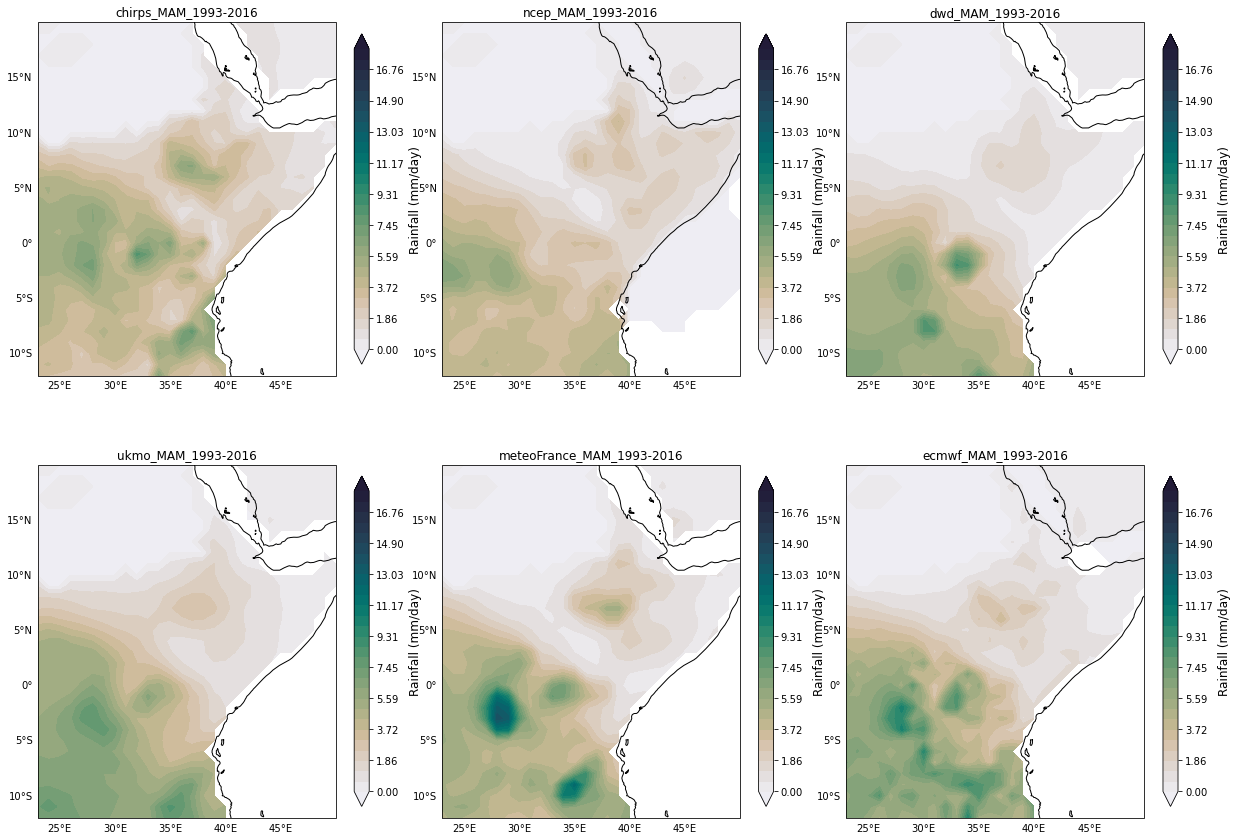

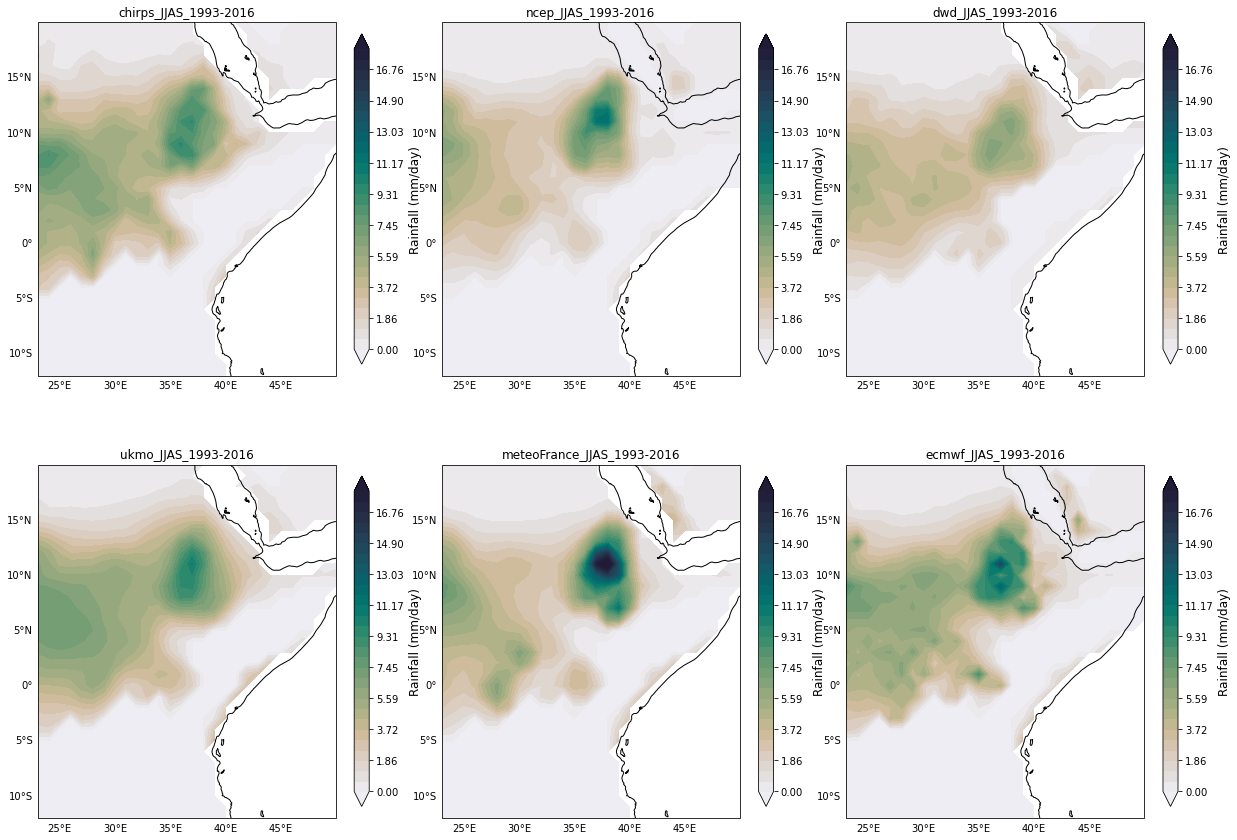

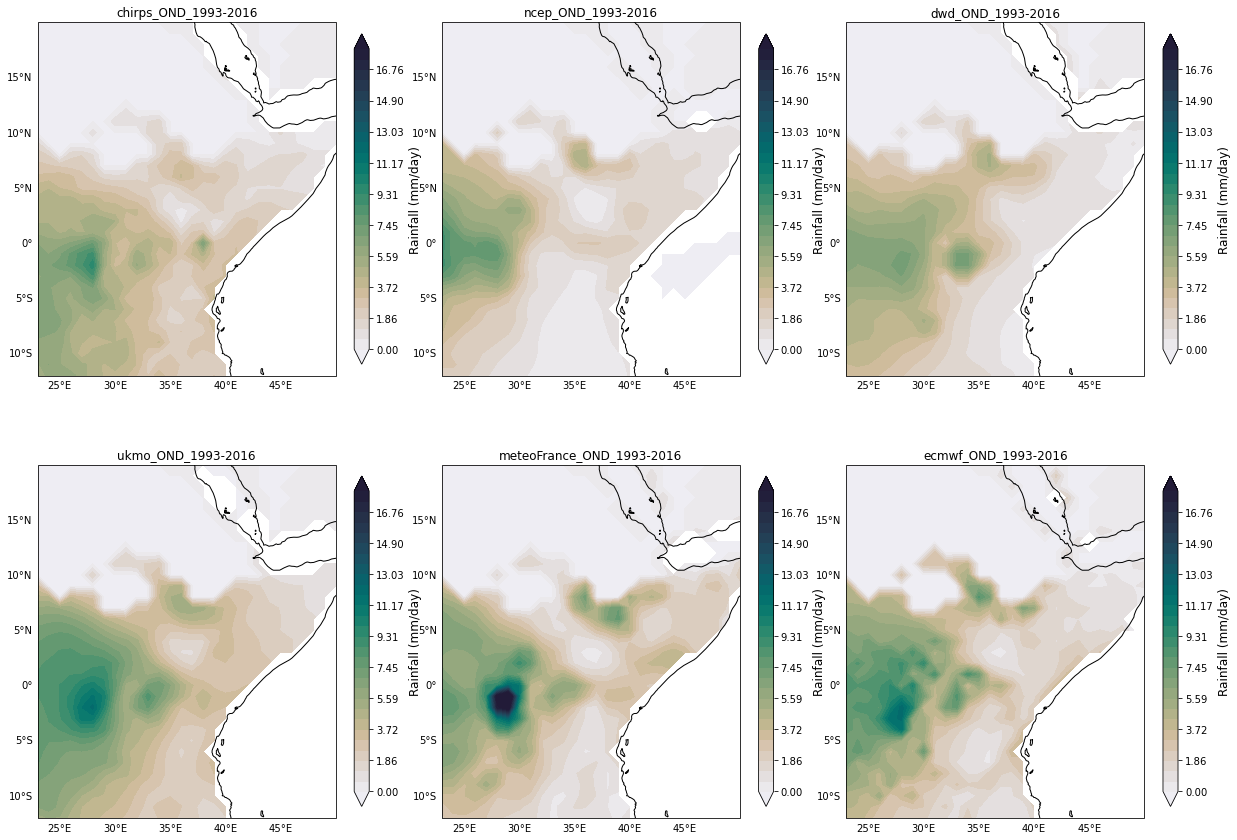

In [13]:
#spatial plots (seasons-wise) with masked data

models = [model1,model2,model3,model4,model5,model6]
seasons = [season1,season2,season3]

MOD_VAR='precip'
DATAPATH = '/home/hdesta/Documents/atmos/seasonalEastAfrica/eastAfrica/'
FIGPATH = 'plots/'

path = [DATAPATH]
variables = [MOD_VAR]

for season in seasons:
    #set seasonal thresholds
    if(season == 'MAM'):
        threshold = 4 
    elif(season == 'JJAS'):
        threshold = 7
    else:
        threshold = 3
    
    #set plot figure areas
    fig = plt.figure(figsize=(17,13))
    proj = ccrs.PlateCarree()
    ax_list = []
    gl_list = []
    ax = []
        
    for i in range(6):
        if (i == 0):
            ax_list.append(plt.subplot(2,3,i+1,projection=proj))
            gl_list.append(0)
        else:
            ax_list.append(plt.subplot(2,3,i+1, projection=proj, sharex=ax_list[0], sharey=ax_list[0]))
            gl_list.append(0)
        #print(gl_list)
            
    for i, model in zip(range(len(models)), models):
        #print(i)
       
        data = ['precip_' + model + '_' + season + '_masked_timmean_1993-2016.nc']
        #print(data) 
        [output, lats, lons] = datareader(path, data, variables)
        
        #filter out data point less than threshold level
        #masked = np.where(output < threshold, threshold, output) 
        #masked = np.where(output < threshold, 0, output)
        masked = output
        
        data_list = [masked]
        labels_list = [model + '_' + season + '_1993-2016']
        
        #print(labels_list)
        
        stepSize=30
        colorbar_levels = np.linspace(0,18,stepSize)
        
        
        CS = ax_list[i].contourf(lons, lats, data_list[0], transform=ccrs.PlateCarree(), cmap=cmo.cm.rain, extend='both', levels=colorbar_levels)
        ax_list[i].coastlines()
        #ax_list[i].add_feature(shape_feature)
        ax_list[i].set(title=labels_list[0], xlabel='Longitude', ylabel='Latitude')
            
        #ax_list[i].set_aspect('equal')
        
        cb = fig.colorbar(CS, ax=ax_list[i], orientation='vertical', shrink=0.7)#, format='%.2f')
        cb.set_label('Rainfall (mm/day)', fontsize=12)    
        #ax_list[i].legend(loc='upper left')
            
        gl_list[i] = ax_list[i].gridlines(crs=proj, draw_labels=True, linewidth=2, color='gray', alpha=0, linestyle='--')
        gl_list[i].top_labels = False
        gl_list[i].right_labels = False
            
        gl_list[i].xformatter = LONGITUDE_FORMATTER
        gl_list[i].yformatter = LATITUDE_FORMATTER
    plt.tight_layout()
    plt.savefig(FIGPATH + 'precip_all_models' + '_' + season + '_masked_1993-2016' + '.png', format='png', dpi=250, bbox_inches='tight')

### **correlations among models and observation by standardized data** ###

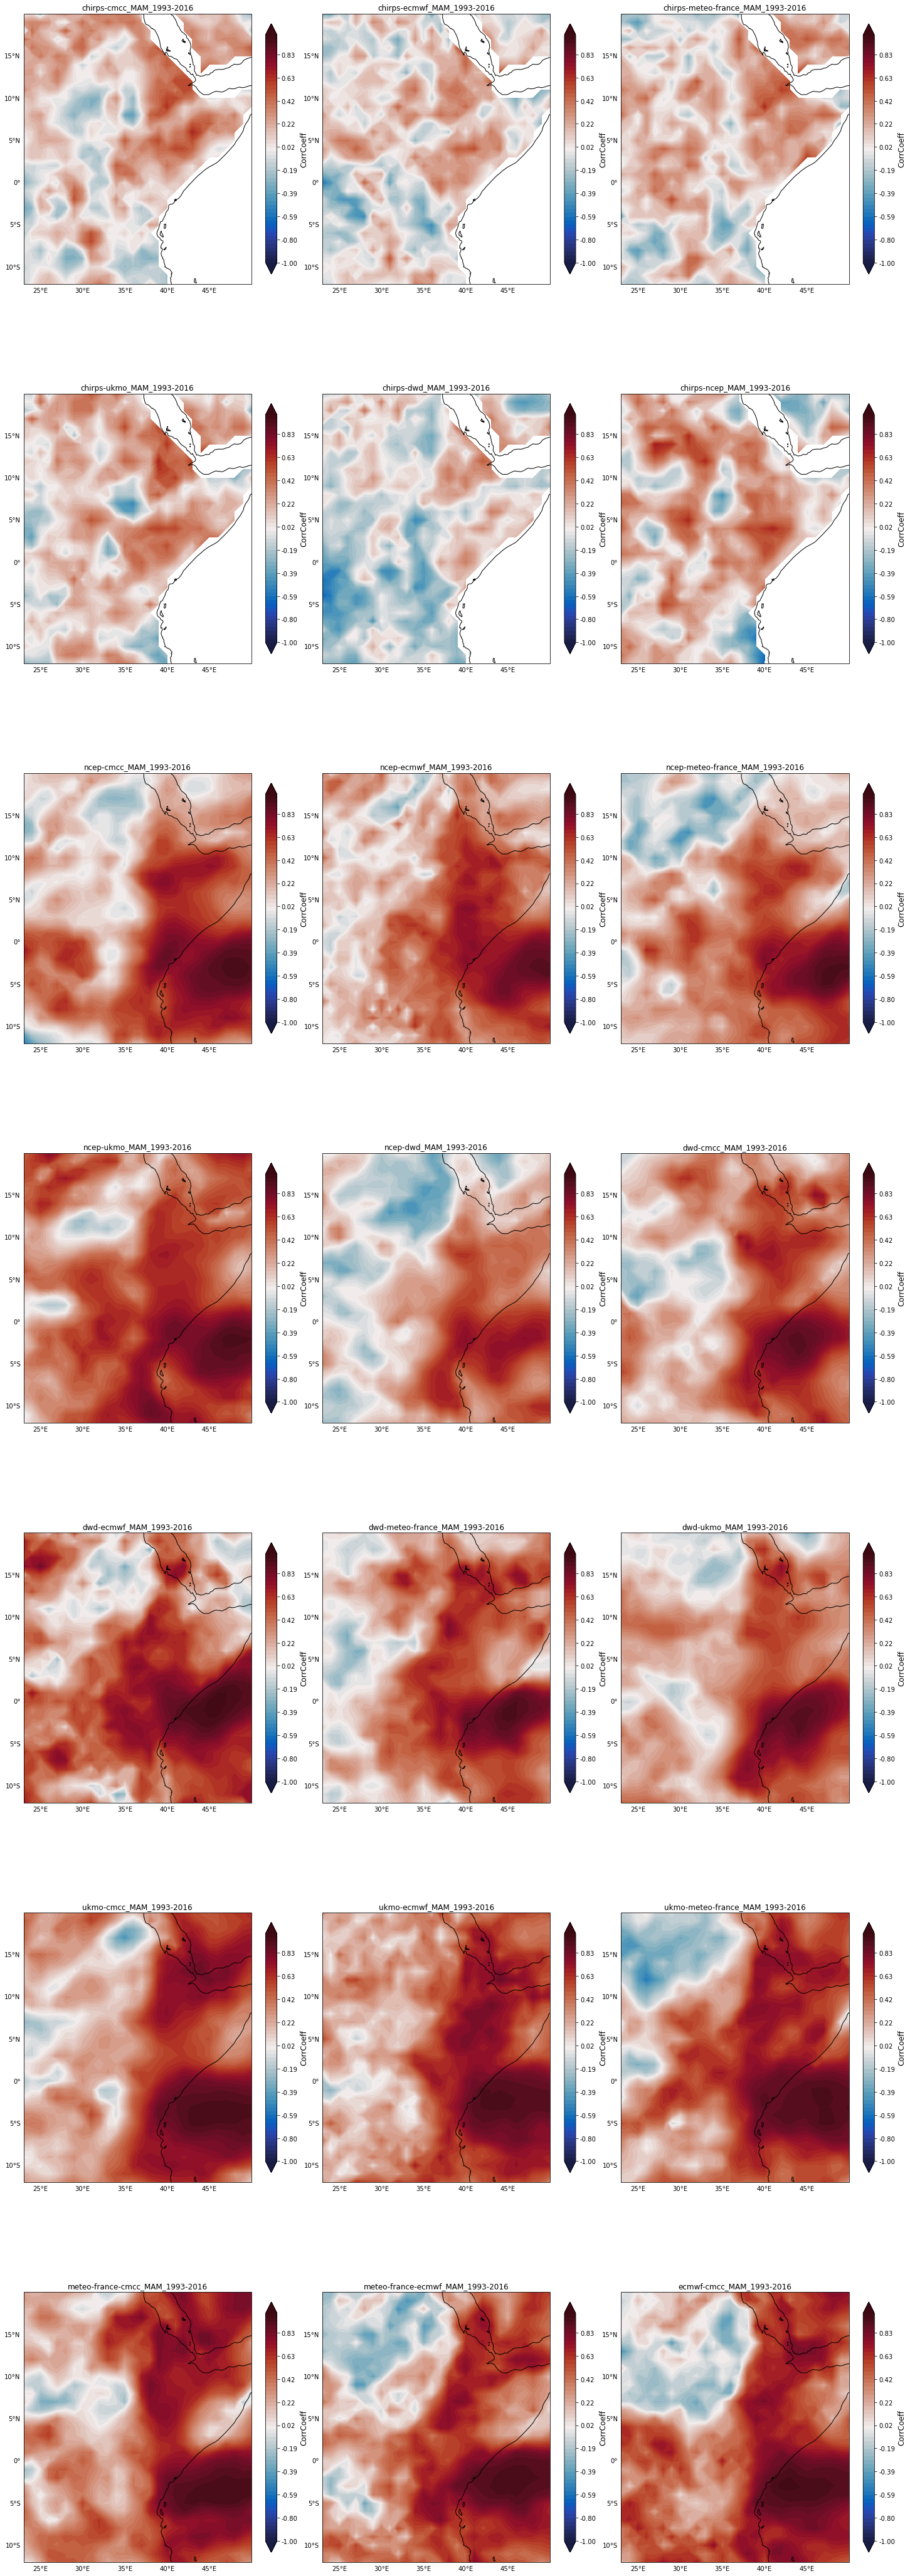

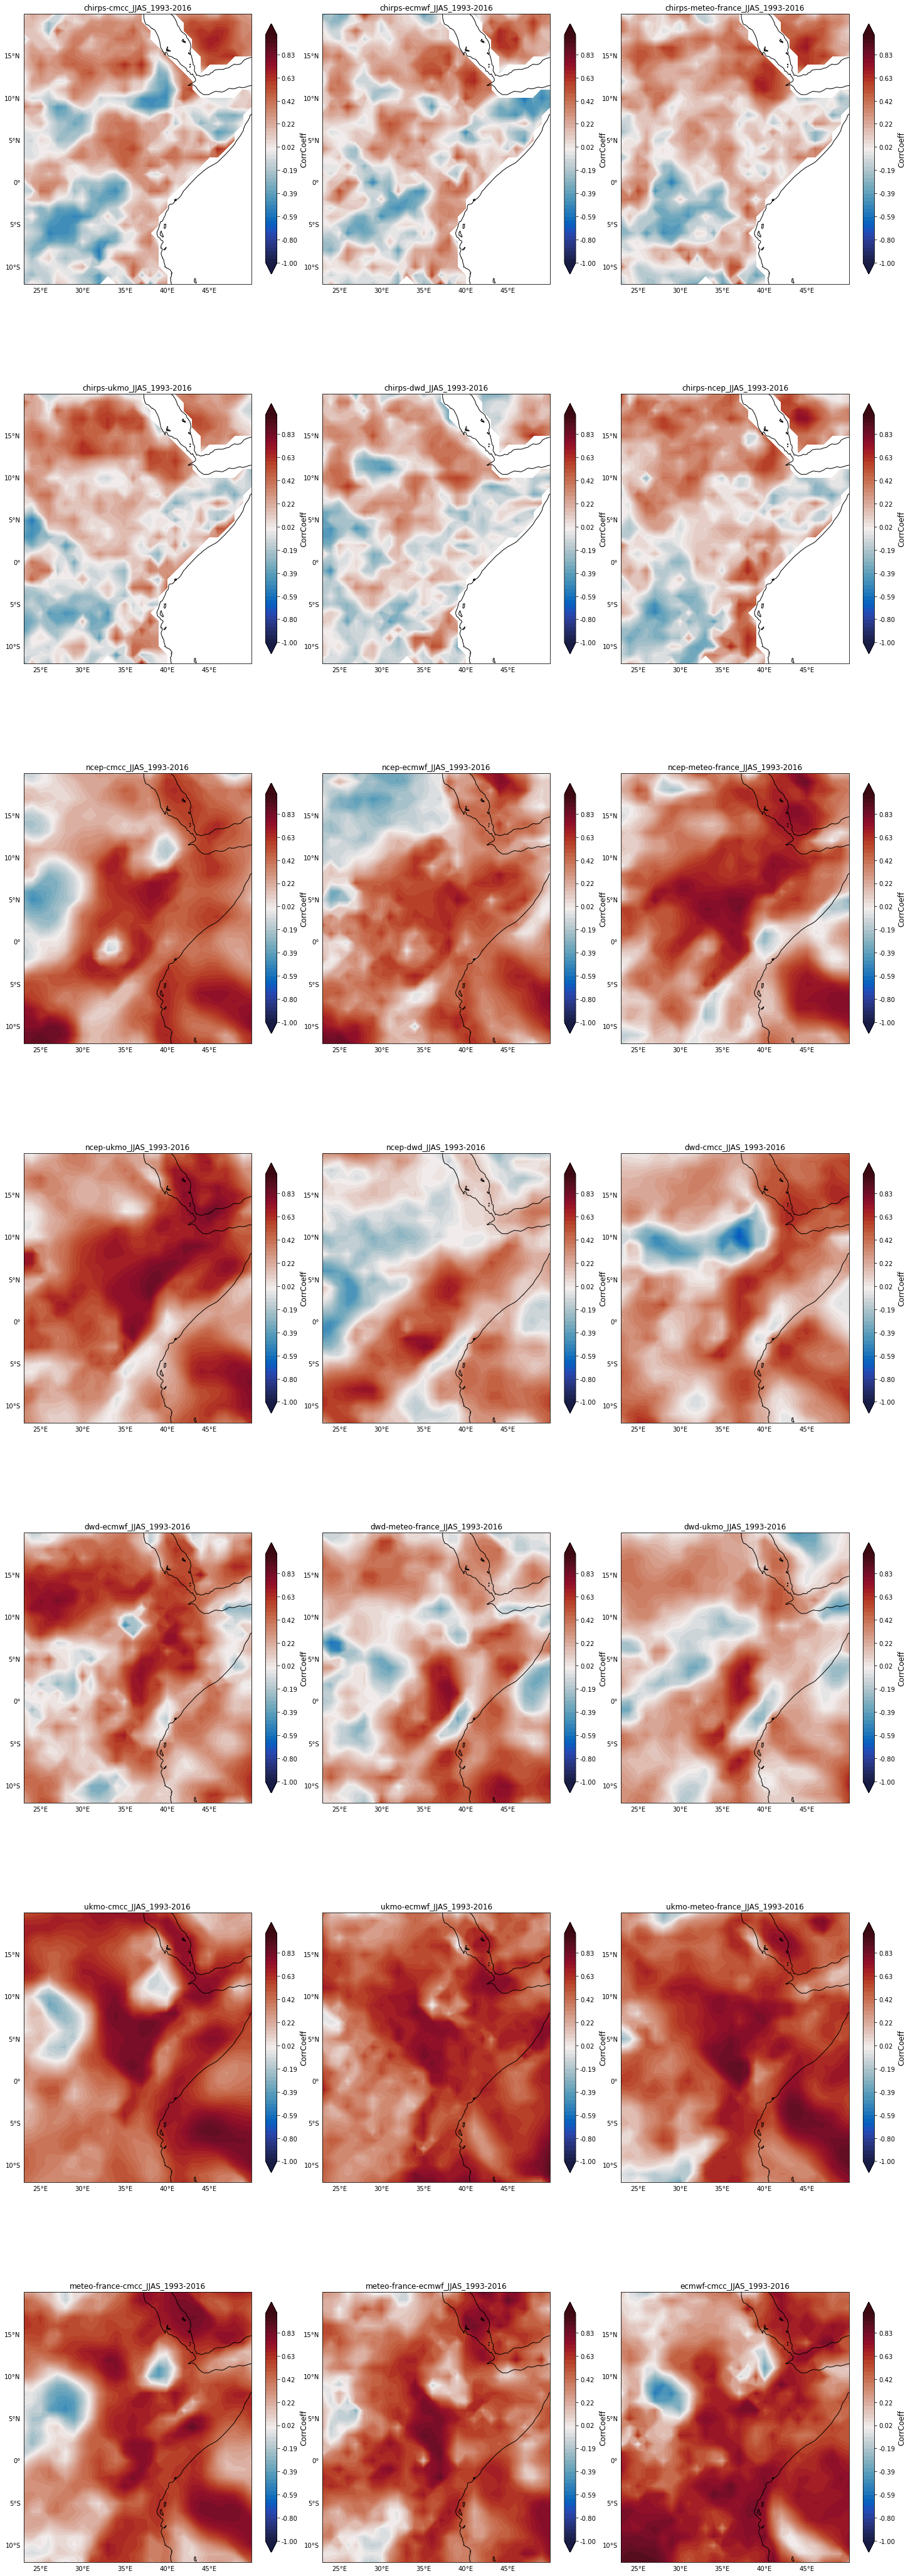

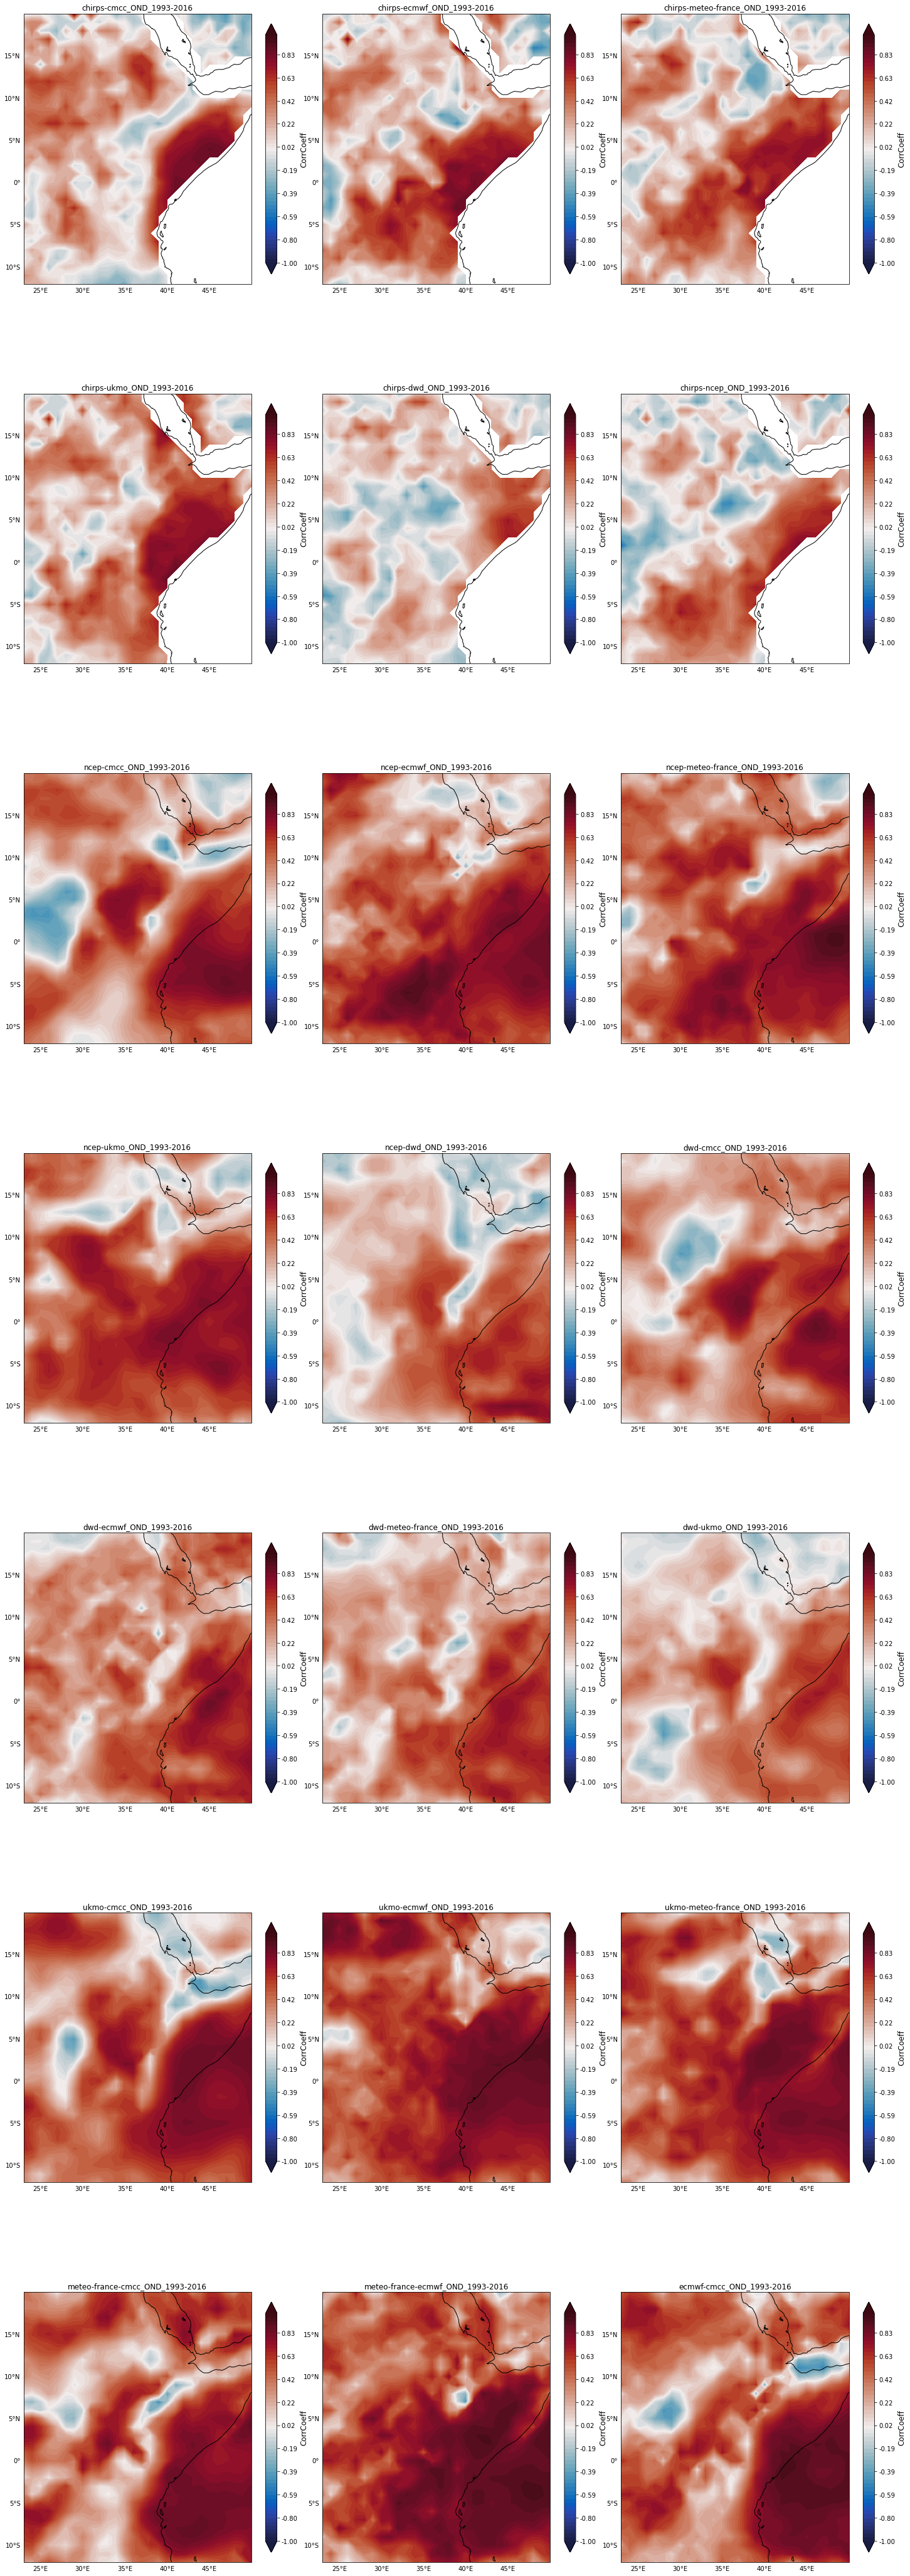

In [11]:
#spatial plots 

modelsFor = [model1,model2,model3,model4,model5,model6,model7]
modelsRev = [model7,model6,model5,model4,model3,model2,model1]
seasons = [season1,season2,season3]

DATAPATH = '/home/hdesta/Documents/atmos/seasonalEastAfrica/eastAfrica/'
FIGPATH = 'plots/'

MOD_VAR='precip'
path = [DATAPATH]
variables = [MOD_VAR]

stepSize=60
colorbar_levels=np.linspace(-1,1,stepSize)

for season in seasons:
    #print(season)
    
    #axis index
    i=0
    
    fig = plt.figure(figsize=(20,60))
    proj = ccrs.PlateCarree()
    ax_list = []
    gl_list = []
    ax = []
        
    for j in range(21):
        if (j == 0):
            ax_list.append(plt.subplot(7,3,j+1,projection=proj))
            gl_list.append(0)
        else:
            ax_list.append(plt.subplot(7,3,j+1, projection=proj, sharex=ax_list[0], sharey=ax_list[0]))
            gl_list.append(0)
                
    for mod1 in modelsFor:
        #print(mod1)
        for mod2 in  modelsRev:
            #print(mod2)
            #print(path[0] + MOD_VAR + '_' + mod1 + '-' + mod2 + '_' + season + '_standardized_corr_1993-2016.nc', i)
            if not os.path.isfile(path[0] + MOD_VAR + '_' + mod1 + '-' + mod2 + '_' + season + '_standardized_corr_1993-2016.nc'):  #if 'model1-model2' file doesn't exist, loop back
                #print(mod1+'-'+mod2,i)
                continue

            data = ['precip_' + mod1 + '-' + mod2 + '_' + season + '_standardized_corr_1993-2016.nc']
            #print(model2) 
            [output, lats, lons] = datareader(path, data, variables)
              
            data_list = [output]
            labels_list = [mod1 + '-' + mod2 + '_' + season + '_1993-2016']

            CS = ax_list[i].contourf(lons, lats, data_list[0], transform=ccrs.PlateCarree(), cmap=cmo.cm.balance, extend='both', levels=colorbar_levels)
            ax_list[i].coastlines()
            #ax_list[i].add_feature(shape_feature)
            ax_list[i].set(title=labels_list[0], xlabel='Longitude', ylabel='Latitude')
            
            #ax_list[i].set_aspect('equal')
        
            cb = fig.colorbar(CS, ax=ax_list[i], orientation='vertical', shrink=0.6, format='%.2f')
            cb.set_label('CorrCoeff', fontsize=12)    
            #ax_list[i].legend(loc='upper left')
            
            gl_list[i] = ax_list[i].gridlines(crs=proj, draw_labels=True, linewidth=2, color='gray', alpha=0, linestyle='--')
            gl_list[i].top_labels = False
            gl_list[i].right_labels = False
            
            gl_list[i].xformatter = LONGITUDE_FORMATTER
            gl_list[i].yformatter = LATITUDE_FORMATTER
            #increament i (index of axis) whenever model combination ploted 
            i+=1
    plt.tight_layout()    
    plt.savefig(FIGPATH + 'precip' + '_' + season + '_correlation_1993-2016' + '.png', format='png', dpi=250, bbox_inches='tight')

### **taylor diagram** ###

In [129]:
import skill_metrics as sm
from pandas import DataFrame
from netCDF4 import Dataset

In [145]:
models = [model1,model2,model3,model4,model5,model6,model7]
seasons = [season1,season2,season3]

season = seasons[2]

modVar='precip'
dataPath = '/home/hdesta/Documents/atmos/seasonalEastAfrica/eastAfrica/'
figPath = 'plots/'

#jjasModel1Data = 'precip_' + model1 + '_JJAS_standardized_yearmean_fldmean_1993-2016.nc'

mod = ['model1','model2','model3','model4','model5','model6','model7']
for i in range(len(models)):
    data = Dataset(dataPath + 'precip_' + models[i] + '_' + season + '_yearmean_fldmean_1993-2016.nc', mode='r')
    mod[i] = data.variables['precip'][:] #mod[1], mod[2],... (eg., data(model1), data(model2),...)
    
allData = DataFrame()

for i in range(len(mod)):
    allData[models[i]] = mod[i][:]

In [146]:
allData.head()

chirps      ncep       dwd      ukmo  meteoFrance     ecmwf      cmcc
0  1.786055  1.459097  1.782033  2.863742     2.509131  2.386723  3.230806
1  2.306541  1.783973  2.077331  3.330626     3.161811  3.275939  3.499048
2  1.942959  1.452077  1.924728  3.174931     2.480255  2.572909  3.285021
3  1.734449  1.395951  1.865786  2.464073     2.184034  2.429660  3.080274
4  3.452521  1.576581  1.882034  3.488136     2.859385  3.030787  3.690536

In [147]:
label = list(allData.columns.values[:])
label

['chirps', 'ncep', 'dwd', 'ukmo', 'meteoFrance', 'ecmwf', 'cmcc']

In [148]:
taylorStats1 = sm.taylor_statistics(allData.ncep, allData.chirps,'allData')
taylorStats2 = sm.taylor_statistics(allData.dwd, allData.chirps,'allData')
taylorStats3 = sm.taylor_statistics(allData.ukmo, allData.chirps,'allData')
taylorStats4 = sm.taylor_statistics(allData.meteoFrance, allData.chirps,'allData')
taylorStats5 = sm.taylor_statistics(allData.ecmwf, allData.chirps,'allData')
taylorStats6 = sm.taylor_statistics(allData.cmcc, allData.chirps,'allData')

In [149]:
taylorStats1

{'ccoef': array([1.        , 0.19089266]),
 'crmsd': [0.0, 0.39166466582752907],
 'sdev': [0.38609369313594327, 0.1725200709725533]}

In [150]:
print(taylorStats1['sdev'][0],taylorStats2['sdev'][0],taylorStats3['sdev'][0],taylorStats4['sdev'][0],taylorStats5['sdev'][0],taylorStats6['sdev'][0])

0.38609369313594327 0.38609369313594327 0.38609369313594327 0.38609369313594327 0.38609369313594327 0.38609369313594327


In [151]:
 sdev = np.array([taylorStats1['sdev'][0], taylorStats1['sdev'][1], taylorStats2['sdev'][1], taylorStats3['sdev'][1], taylorStats4['sdev'][1], taylorStats5['sdev'][1], taylorStats6['sdev'][1]])
crmsd = np.array([taylorStats1['crmsd'][0],taylorStats1['crmsd'][1],taylorStats2['crmsd'][1],taylorStats3['crmsd'][1],taylorStats4['crmsd'][1],taylorStats5['crmsd'][1],taylorStats6['crmsd'][1]])
ccoef = np.array([taylorStats1['ccoef'][0],taylorStats1['ccoef'][1],taylorStats2['ccoef'][1],taylorStats3['ccoef'][1],taylorStats4['ccoef'][1],taylorStats5['ccoef'][1],taylorStats6['ccoef'][1]])

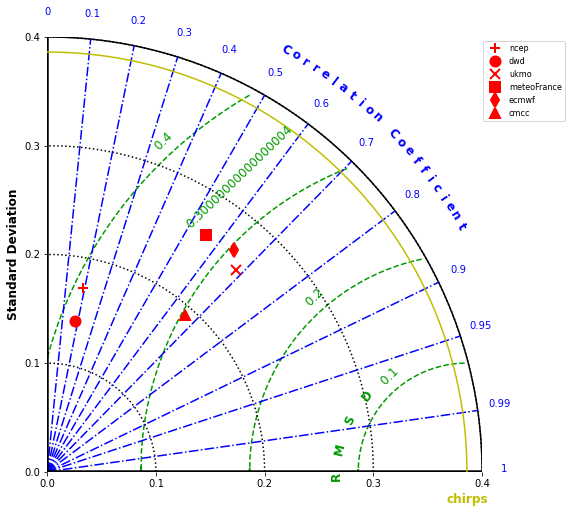

In [152]:
fig=plt.figure(figsize=(10,8))
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel=label, markerLegend='on', markerColor='r', titleOBS='chirps', colOBS='y', styleOBS='-')#, tickRMS=[0.0,0.05,0.1,0.15,0.2,0.25])

plt.savefig(figPath + 'taylor_diagram_' + season + '_standardized.png')